# Pronóstico de la evolución de pacientes con diabetes

## Descripción del problema real

Los tratamientos médicos están basados en las expectativas de recuperación o el avance de una enfermedad para tomar decisiones. En este caso, un equipo médico desea contar con pronósticos de pacientes con diabetes para tomar decisiones sobre su tratamiento.

## Descripción del problema en términos de los datos

Se desea determinar el progreso de la diabeteis un año hacia adelante a partir de las variables medidas para 442 pacientes. La información está almacenada en el archivo `datos/diabetes.csv`. Las variables medidas son: edad, sexo, indice de masa corporal, presión sanguinea y seis medidas de serum en la sangre. Se desea pronósticar el progreso de la enfermedad a partir de las variables dadas.

## Aproximaciones posibles

En este caso, se desea comparar los resultados de un modelo de regresión lineal y un modelo de redes neuronales artificiales.

## Requerimientos

Usted debe:

* Determinar cuáles de las variables consideradas son relevantes para el problema.


* Determinar si hay alguna transformación de las variables de entrada o de salida que mejore el pronóstico del modelo.


* Construir un modelo de regresión lineal que sirva como base para construir un modelo de redes neuronales artificiales.



* Construir un modelo de redes neuronales artificiales. Asimismo, debe determinar el número de neuronas en la capa o capas ocultas.


* Utiizar una técnica como crossvalidation u otra similar para establecer la robustez del modelo.

# Desarrollo del ejercicio

## Configuración del ambiende de desarrollo - importación de librerias

Lo primero que se debe hacer es configurar el ambiende de desarrolo, importando las librerias necesarias para trabajar.

In [33]:
##Importar las librerias necesarias para trabajar 
import os
import numpy as np 
import sys
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn import linear_model
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error,classification_report
from sklearn.neural_network import MLPRegressor
from statsmodels import robust
from sklearn.feature_selection import RFECV



%matplotlib inline

## Lectura de datos
En primer lugar se leen los datos provenientes del archivo diabetes.cvs facilitado por el profesor. Para esto se hace uso de la libreria pandas (pd) y sus funciones. 

In [3]:
#Extraer los datos de precios de la electricidad

##Este es la direccion donde estan todos los Exceles de donde saldran los datos
ruta  = r'C:\Users\nelson.barco\NFBB\Redes Neuronales\evaluacion-nfbarcob03-master\evaluacion-nfbarcob03-master\datos\diabetes.csv'

dataFrame = pd.read_csv(ruta)
dataFrame.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,Y
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,135.0


## Escalamiento de datos

Como existen valores negativos todos los valors deben escalarse para que estos negativos no alteren el comportamiento del modelo

In [4]:
scaler = MinMaxScaler()
dataFrameScalar = pd.DataFrame(scaler.fit_transform(dataFrame), columns=dataFrame.columns)
dataFrameScalar.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,Y
0,0.666667,1.0,0.582645,0.549296,0.294118,0.256972,0.207792,0.282087,0.562217,0.439394,0.392523
1,0.483333,0.0,0.148760,0.352113,0.421569,0.306773,0.623377,0.141044,0.222443,0.166667,0.155763
2,0.883333,1.0,0.516529,0.436620,0.289216,0.258964,0.246753,0.282087,0.496584,0.409091,0.361371
3,0.083333,0.0,0.301653,0.309859,0.495098,0.447211,0.233766,0.423131,0.572936,0.469697,0.563863
4,0.516667,0.0,0.206612,0.549296,0.465686,0.417331,0.389610,0.282087,0.362369,0.333333,0.342679


In [5]:
dataFrameScalar.describe()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,Y
count,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000
mean,0.491968,0.468326,0.346107,0.459818,0.451668,0.367725,0.360889,0.291996,0.485557,0.503942,0.396054
std,0.218484,0.499561,0.182567,0.194806,0.169647,0.151460,0.167977,0.182010,0.183364,0.174187,0.240165
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.320833,0.000000,0.214876,0.309859,0.329657,0.271165,0.237013,0.141044,0.357528,0.382576,0.193146
50%,0.516667,0.000000,0.318182,0.436620,0.436275,0.355578,0.337662,0.282087,0.478057,0.500000,0.359813
75%,0.666667,1.000000,0.465909,0.605634,0.552696,0.462649,0.464286,0.423131,0.610446,0.606061,0.580997
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Desarrollo modelo de regresión lineal

El procedimiento paa buscar el mejor modelo sera el siguiente:
1. Se hara la regresión lineal con solo 1 variable,es decir, se generara un modelo de regresiion lineal por cada variable del set de datos y se escojera el que tenga menor error MAE (Mean Absolute Error), MSE (Mean Square Error) y MAE (Mean Absolute Desviation)
2. Se tomara el mejor modelo del punto anterior y se le agregara 1 variable, esto se hara para todas las variables restantes (es decir, exeptuando la escogida en el punto 1)
3. Se seguira haciendo este procedimiento hasta completar las variables o llegar al modelo con menor error posible


<img src="https://econbrowser.com/wp-content/uploads/2019/07/msemae.png">

C:\Users\nelson.barco\Anaconda3\lib\site-packages\ipykernel_launcher.py:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\nelson.barco\Anaconda3\lib\site-packages\ipykernel_launcher.py:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\nelson.barco\Anaconda3\lib\site-packages\ipykernel_launcher.py:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://p

  variable       MSE       MAE                     MAD
0      age  0.046463  0.177032   [0.04653848479780367]
0      sex  0.048193  0.180658                   [0.0]
0      bmi  0.040580  0.166168   [0.14174540497953556]
0       bp  0.041536  0.158303   [0.12142150041365171]
0       s1  0.046339  0.174048  [0.054993946874454684]
0       s2  0.046337  0.175255   [0.04578297817293852]
0       s3  0.045096  0.174555   [0.10694423094038401]
0       s4  0.040990  0.164925   [0.12251735490917004]
0       s5  0.037161  0.155105   [0.14627894351788143]
0       s6  0.041229  0.164317   [0.06967626003637085]
Para el modelo de regresion lineal con 1 variable, el menor error MSE fue de 0.0371605854454314 con fue con la variable s5
Para el modelo de regresion lineal con 1 variable, el menor error MAE fue de 0.1551045387129661 y fue con la variable s5
Para el modelo de regresion lineal con 1 variable, el menor error MAD fue de [0.] con fue con la variable sex


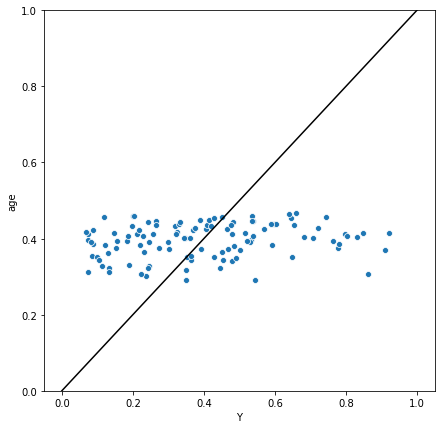

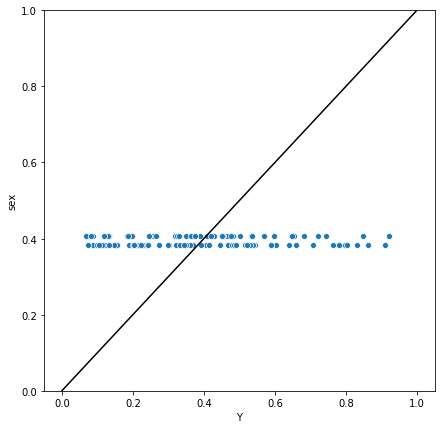

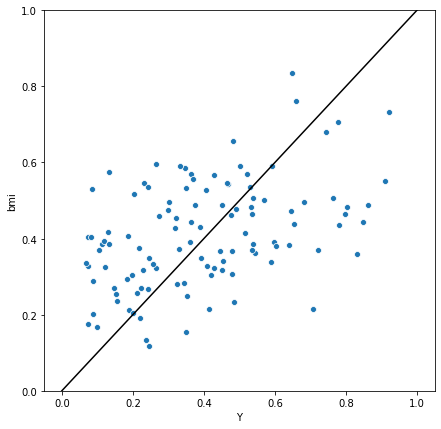

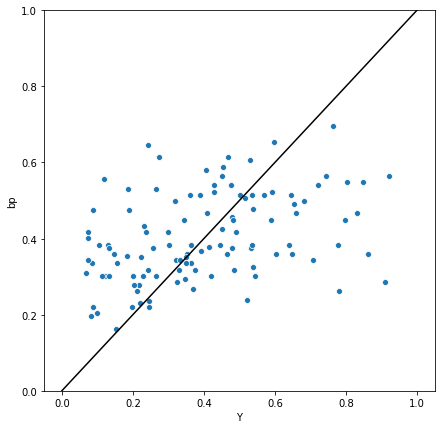

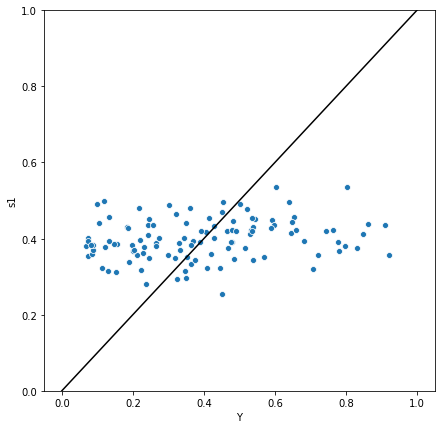

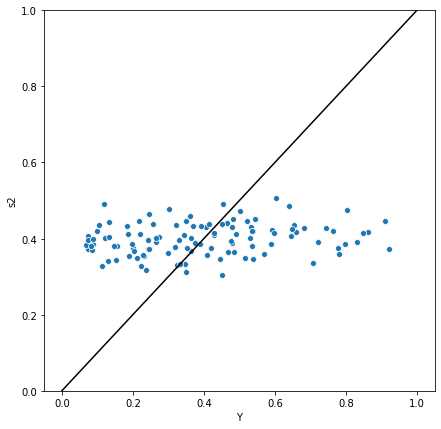

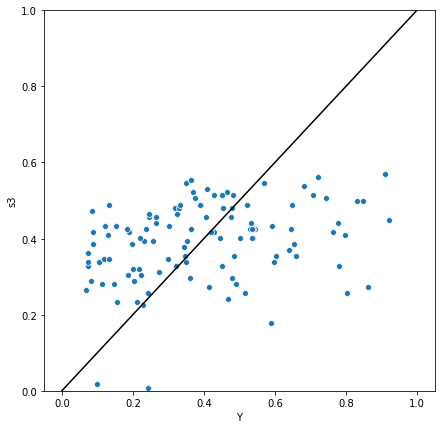

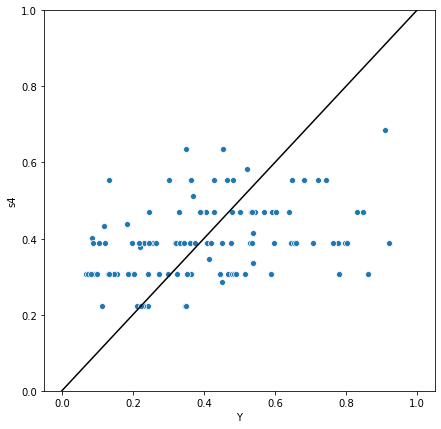

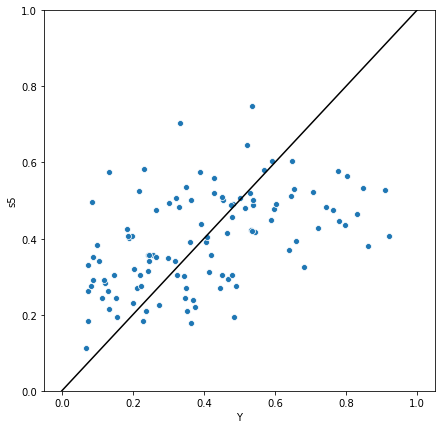

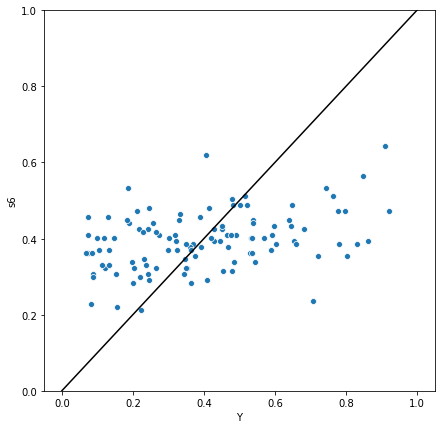

In [6]:
variables=dataFrame.columns
variables=variables[:-1]
columnas=['variable','MSE','MAE','MAD']

MSEoptimo=None
MAEoptimo=None
MADoptimo=None
variableMSEoptima=None
variableMAEoptima=None
variableMADoptima=None

resultados=pd.DataFrame(columns=columnas)

for i in variables:
    MSE=0
    MAE=0
    MAD=0
    x=dataFrameScalar.loc[:,[i]]
    y=dataFrameScalar.loc[:,['Y']]
    xEntrenamiento, xValidacion, yEntrenamiento, yValidacion = train_test_split(x, y, test_size=0.25, random_state=0)
    
    xEntrenamiento=xEntrenamiento.transpose()
    xEntrenamiento=xEntrenamiento.values.reshape(-1,1)
    
    yEntrenamiento=yEntrenamiento.transpose()
    yEntrenamiento=yEntrenamiento.values.reshape(-1,1)
    
    xValidacion=xValidacion.transpose()
    xValidacion=xValidacion.values.reshape(-1,1)
    
    
    model=linear_model.LinearRegression()
    model.fit(xEntrenamiento,yEntrenamiento)
    yPrediccion=model.predict(xValidacion)
    MSE=mean_squared_error(yValidacion,yPrediccion)
    MAE=mean_absolute_error(yValidacion,yPrediccion)
    MAD=robust.mad(yPrediccion)
    
    resultado=pd.DataFrame([[i,MSE,MAE,MAD]],columns=columnas)
    resultados=pd.concat([resultados,resultado])
    
    plt.figure(figsize=(7, 7))
    yValidacion[i] = yPrediccion
    sns.scatterplot(x='Y', y=i, data= yValidacion)
    plt.plot([0, 1], [0, 1], color='black')
    plt.ylim(0,1)
    
    #print('Para la regresion lineal con la variable {} el error cuadratico medio es MSE={}, el error absoluto medio MAE={} y la desviación absoluta media MAD={}'.
    #      format(i, MSE,MAE,MAD))
    if MSEoptimo==None or MSE<MSEoptimo:
        MSEoptimo=MSE
        variableMSEoptima=i
    if MAEoptimo==None or MAE<MAEoptimo:
        MAEoptimo=MAE
        variableMAEoptima=i
    if MADoptimo==None or MAD<MADoptimo:
        MADoptimo=MAD
        variableMADoptima=i

        
print(resultados)
print("Para el modelo de regresion lineal con 1 variable, el menor error MSE fue de {} con fue con la variable {}".
      format(MSEoptimo,variableMSEoptima))
print("Para el modelo de regresion lineal con 1 variable, el menor error MAE fue de {} y fue con la variable {}".
      format(MAEoptimo,variableMAEoptima))
print("Para el modelo de regresion lineal con 1 variable, el menor error MAD fue de {} con fue con la variable {}".
      format(MADoptimo,variableMADoptima))

De las graficas y los datos presentados, se concluye que la primera variable a tomar para el modelo de regresion lineal es S5. El MSE es de 0.03716 

C:\Users\nelson.barco\Anaconda3\lib\site-packages\ipykernel_launcher.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\nelson.barco\Anaconda3\lib\site-packages\ipykernel_launcher.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\nelson.barco\Anaconda3\lib\site-packages\ipykernel_launcher.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://p

  variable       MSE       MAE                    MAD
0   s5 age  0.036991  0.154696  [0.14506700185321067]
0   s5 sex  0.036971  0.154190   [0.1503474568832923]
0   s5 bmi  0.034887  0.148964   [0.1571842002008903]
0    s5 bp  0.033837  0.147469   [0.1573401644266632]
0    s5 s1  0.037683  0.155082  [0.13818219776911345]
0    s5 s2  0.037269  0.154898  [0.14675257595119912]
0    s5 s3  0.036839  0.153977  [0.15973780737974577]
0    s5 s4  0.036547  0.154739  [0.15306718458824103]
0    s5 s6  0.035259  0.151086  [0.14746185267117443]
Para el modelo de regresion lineal con 2 variables incluyendo s5, el menor error MSE fue de 0.03383704907738626 y fue con la segunda variable bp
Para el modelo de regresion lineal con 2 variables incluyendo s5, el menor error MAE fue de 0.14746893573100653 y fue con la variable bp
Para el modelo de regresion lineal con 2 variables incluyendo s5, el menor error MAD fue de [0.1381822] con fue con la variable s1


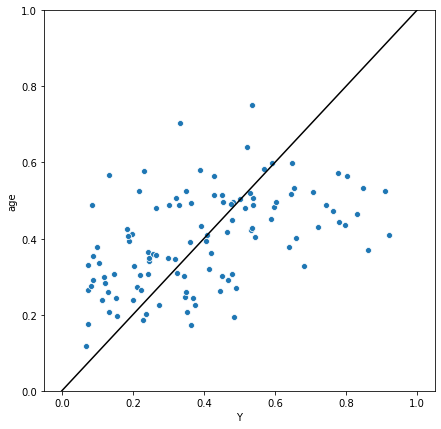

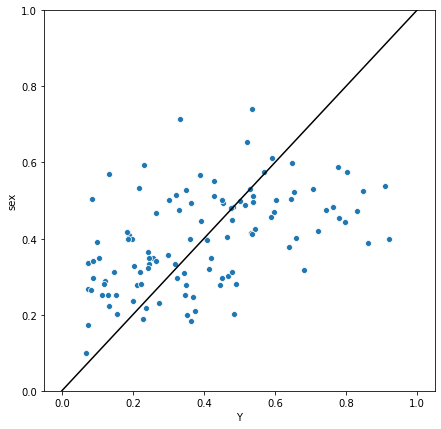

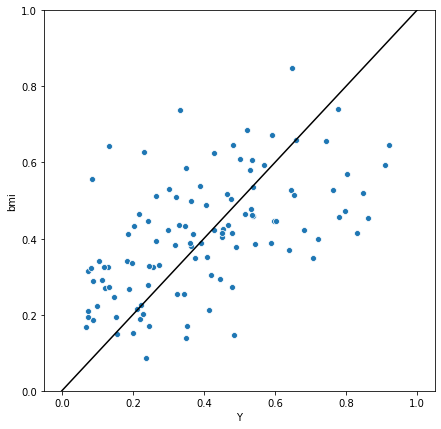

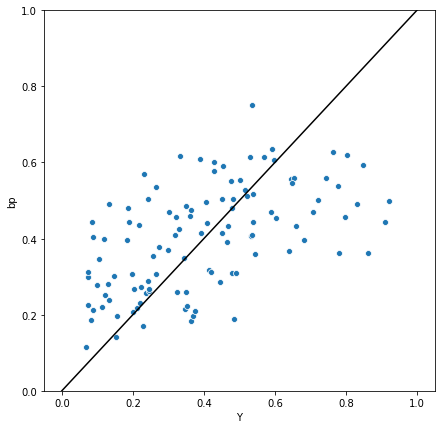

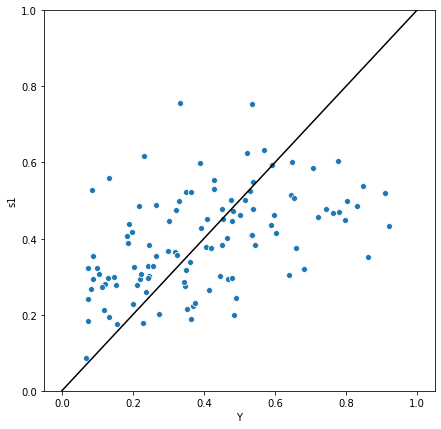

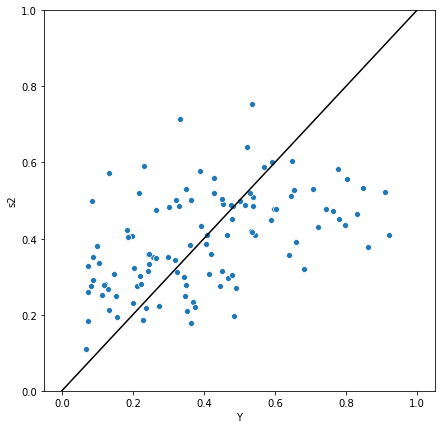

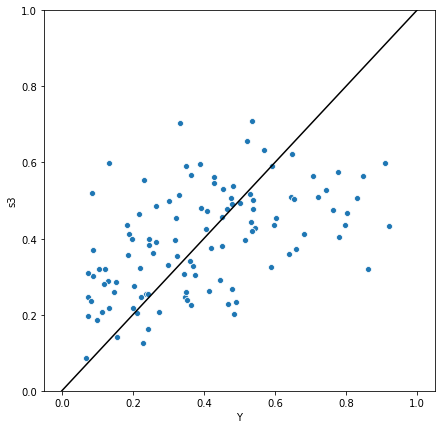

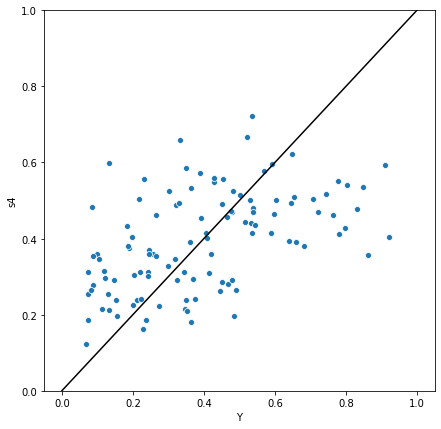

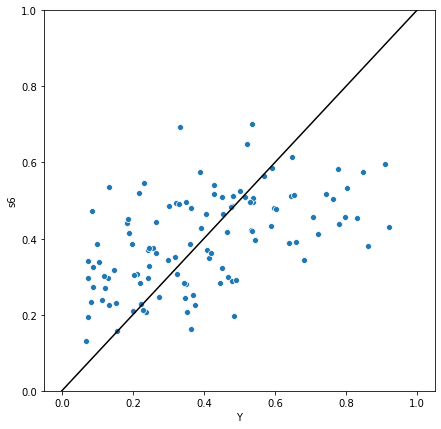

In [7]:
variables=['age','sex','bmi','bp','s1','s2','s3','s4','s6']

MSEoptimo=None
MAEoptimo=None
MADoptimo=None
variableMSEoptima=None
variableMAEoptima=None
variableMADoptima=None

resultados=pd.DataFrame(columns=columnas)

for i in variables:
    MSE=0
    MAE=0
    MAD=0
    
    x=dataFrameScalar.loc[:,[i, 's5']]
    y=dataFrameScalar.loc[:,['Y']]
    xEntrenamiento, xValidacion, yEntrenamiento, yValidacion = train_test_split(x, y, test_size=0.25, random_state=0)

    model=linear_model.LinearRegression()
    model.fit(xEntrenamiento,yEntrenamiento)
    yPrediccion=model.predict(xValidacion)
    MSE=mean_squared_error(yValidacion,yPrediccion)
    MAE=mean_absolute_error(yValidacion,yPrediccion)
    MAD=robust.mad(yPrediccion)
    
    plt.figure(figsize=(7, 7))
    yValidacion[i] = yPrediccion
    sns.scatterplot(x='Y', y=i, data= yValidacion)
    plt.plot([0, 1], [0, 1], color='black')
    plt.ylim(0,1)
    
    resultado=pd.DataFrame([['s5 '+i,MSE,MAE,MAD]],columns=columnas)
    resultados=pd.concat([resultados,resultado])
    
    
    if MSEoptimo==None or MSE<MSEoptimo:
        MSEoptimo=MSE
        variableMSEoptima=i
    if MAEoptimo==None or MAE<MAEoptimo:
        MAEoptimo=MAE
        variableMAEoptima=i
    if MADoptimo==None or MAD<MADoptimo:
        MADoptimo=MAD
        variableMADoptima=i

print(resultados)
print("Para el modelo de regresion lineal con 2 variables incluyendo s5, el menor error MSE fue de {} y fue con la segunda variable {}".
      format(MSEoptimo,variableMSEoptima))
print("Para el modelo de regresion lineal con 2 variables incluyendo s5, el menor error MAE fue de {} y fue con la variable {}".
      format(MAEoptimo,variableMAEoptima))
print("Para el modelo de regresion lineal con 2 variables incluyendo s5, el menor error MAD fue de {} con fue con la variable {}".
      format(MADoptimo,variableMADoptima))

Se obtiene un MSE menor al paso anterior, ahora de 0.033837 para las variables s5 y bp y un MAD de 0.1381 para las variables s5 y s1

Ahora tenemos que las siguiente variable puede ser s1 (por el lado del MAD) o bp (por el lado del MSE). Se procede a probar el modelo de regresion lineal con 3 variables, por un lado s5,s1 e iterando el resto y por otro lado s5,bp e iterando el resto.

Primero hacemos la regresion con s5,bp e iterando las otras variables como la tercer variable de la regresión

C:\Users\nelson.barco\Anaconda3\lib\site-packages\ipykernel_launcher.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\nelson.barco\Anaconda3\lib\site-packages\ipykernel_launcher.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\nelson.barco\Anaconda3\lib\site-packages\ipykernel_launcher.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://p

      variable       MSE       MAE                    MAD
0  s5, bp, age  0.034236  0.148931   [0.1635845972069417]
0  s5, bp, sex  0.033286  0.146358   [0.1717725869501887]
0  s5, bp, bmi  0.032667  0.144950   [0.1723071182994605]
0   s5, bp, s1  0.034256  0.146941  [0.15601745217123555]
0   s5, bp, s2  0.034007  0.147225  [0.15451668241969488]
0   s5, bp, s3  0.033105  0.145737  [0.17568787015211923]
0   s5, bp, s4  0.033133  0.147012    [0.174493697779952]
0   s5, bp, s6  0.033094  0.145608   [0.1596697874192431]
Para el modelo de regresion lineal con 3 variables incluyendo s5 y bp, el menor error MSE fue de 0.03266704922225998 y fue con la tercera variable bmi
Para el modelo de regresion lineal con 3 variables incluyendo s5 y bp, el menor error MAE fue de 0.14494986640391325 y fue con la tercera variable bmi
Para el modelo de regresion lineal con 3 variables incluyendo s5, bp, el menor error MAD fue de [0.15451668] con fue con la tercera variable s2


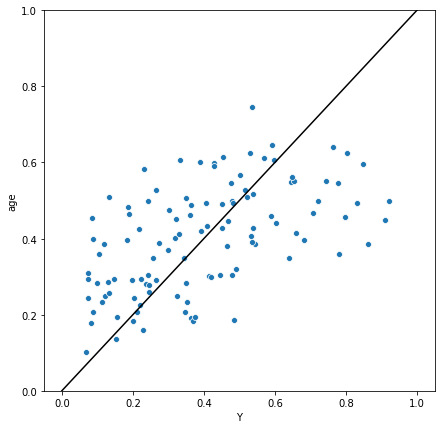

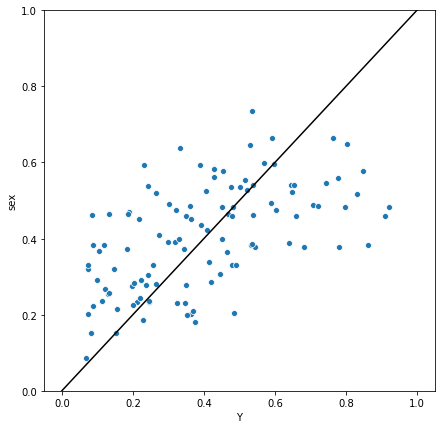

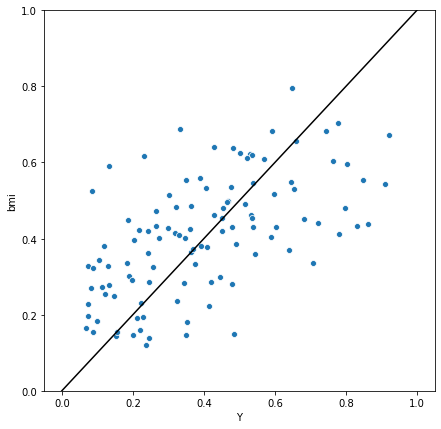

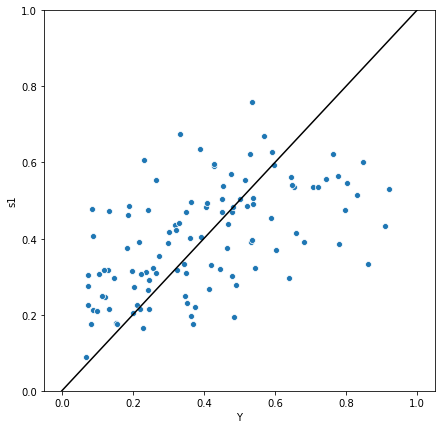

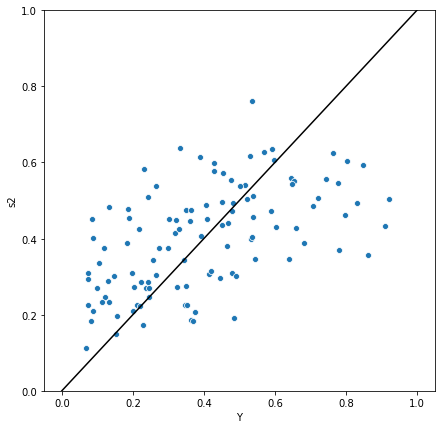

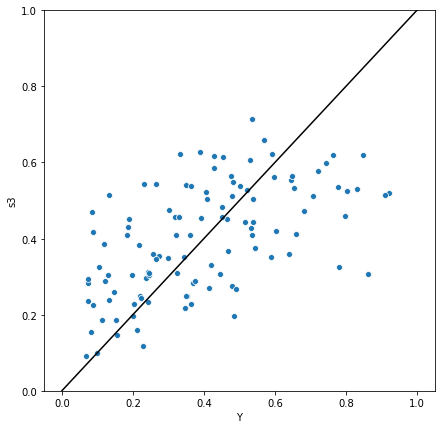

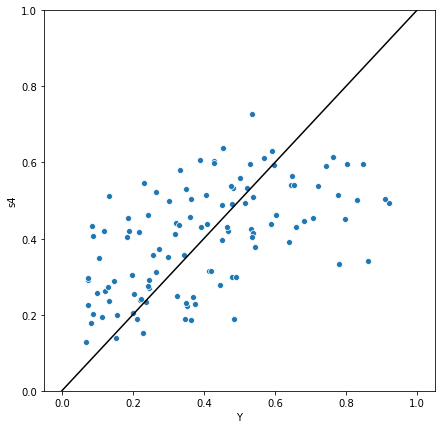

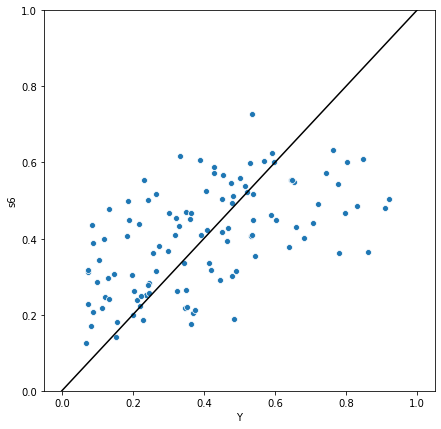

In [8]:
variables=['age','sex','bmi','s1','s2','s3','s4','s6']

MSEoptimo=None
MAEoptimo=None
MADoptimo=None
variableMSEoptima=None
variableMAEoptima=None
variableMADoptima=None

resultados=pd.DataFrame(columns=columnas)

for i in variables:
    MSE=0
    MAE=0
    MAD=0
    
    x=dataFrameScalar.loc[:,[i, 's5','bp']]
    y=dataFrameScalar.loc[:,['Y']]
    xEntrenamiento, xValidacion, yEntrenamiento, yValidacion = train_test_split(x, y, test_size=0.25, random_state=0)

    model=linear_model.LinearRegression()
    model.fit(xEntrenamiento,yEntrenamiento)
    yPrediccion=model.predict(xValidacion)
    MSE=mean_squared_error(yValidacion,yPrediccion)
    MAE=mean_absolute_error(yValidacion,yPrediccion)
    MAD=robust.mad(yPrediccion)
    
    plt.figure(figsize=(7, 7))
    yValidacion[i] = yPrediccion
    sns.scatterplot(x='Y', y=i, data= yValidacion)
    plt.plot([0, 1], [0, 1], color='black')
    plt.ylim(0,1)
    
    resultado=pd.DataFrame([['s5, bp, '+i,MSE,MAE,MAD]],columns=columnas)
    resultados=pd.concat([resultados,resultado])
    
    
    if MSEoptimo==None or MSE<MSEoptimo:
        MSEoptimo=MSE
        variableMSEoptima=i
    if MAEoptimo==None or MAE<MAEoptimo:
        MAEoptimo=MAE
        variableMAEoptima=i
    if MADoptimo==None or MAD<MADoptimo:
        MADoptimo=MAD
        variableMADoptima=i

print(resultados)
print("Para el modelo de regresion lineal con 3 variables incluyendo s5 y bp, el menor error MSE fue de {} y fue con la tercera variable {}".
      format(MSEoptimo,variableMSEoptima))
print("Para el modelo de regresion lineal con 3 variables incluyendo s5 y bp, el menor error MAE fue de {} y fue con la tercera variable {}".
      format(MAEoptimo,variableMAEoptima))
print("Para el modelo de regresion lineal con 3 variables incluyendo s5, bp, el menor error MAD fue de {} con fue con la tercera variable {}".
      format(MADoptimo,variableMADoptima))

con las variables s5,bp y bmi se obtiene un MSE menor al paso anterior, de 0.032667 y con s5,bp y s2 se obtuvo un MAD de 0.1545.

Ahora se probara el resultado con s5,s1 e iterando la tercera variable

C:\Users\nelson.barco\Anaconda3\lib\site-packages\ipykernel_launcher.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\nelson.barco\Anaconda3\lib\site-packages\ipykernel_launcher.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\nelson.barco\Anaconda3\lib\site-packages\ipykernel_launcher.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://p

      variable       MSE       MAE                    MAD
0  s5, s1, age  0.037416  0.154915     [0.14646554191921]
0  s5, s1, sex  0.037451  0.154430  [0.13725748499023033]
0  s5, s1, bmi  0.035257  0.148005  [0.16033935110146152]
0   s5, s1, bp  0.034256  0.146941   [0.1560174521712354]
0   s5, s1, s2  0.036633  0.153788  [0.17075400221375497]
0   s5, s1, s3  0.037306  0.154340   [0.1583613862636591]
0   s5, s1, s4  0.037049  0.153486  [0.15374487845810042]
0   s5, s1, s6  0.035542  0.151051  [0.14057048435692543]
Para el modelo de regresion lineal con 3 variables incluyendo s5 y s1, el menor error MSE fue de 0.03425609770801416 y fue con la tercera variable bp
Para el modelo de regresion lineal con 3 variables incluyendo s5 y s1, el menor error MAE fue de 0.14694119110548282 y fue con la tercera variable bp
Para el modelo de regresion lineal con 3 variables incluyendo s5, s1, el menor error MAD fue de [0.13725748] con fue con la tercera variable sex


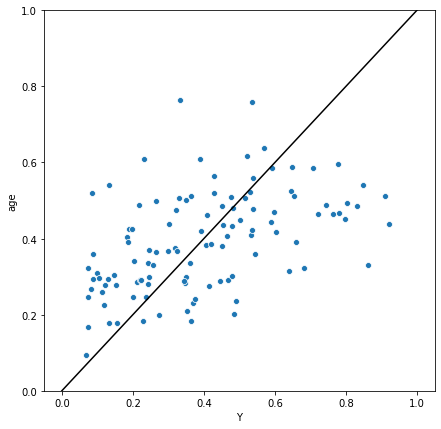

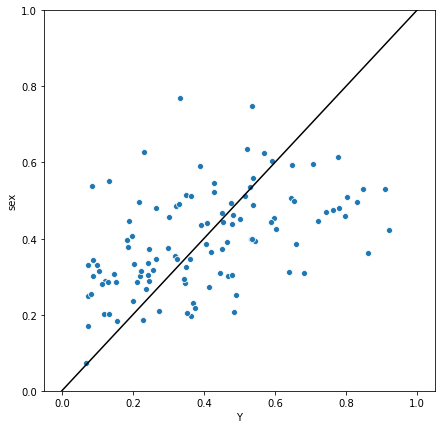

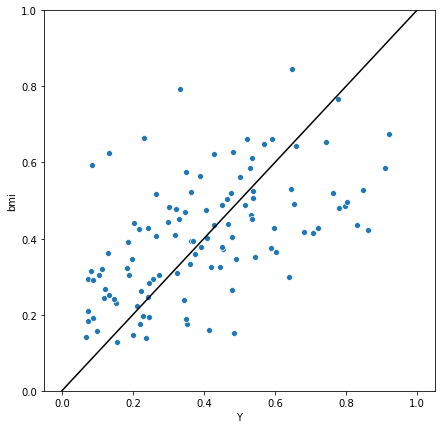

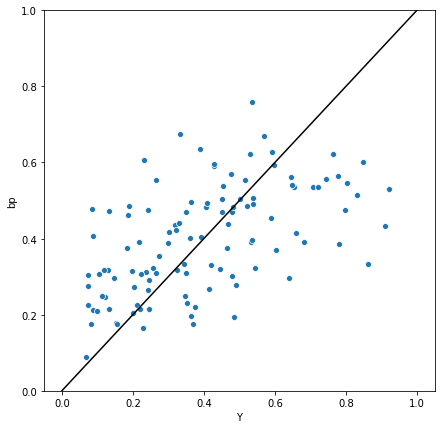

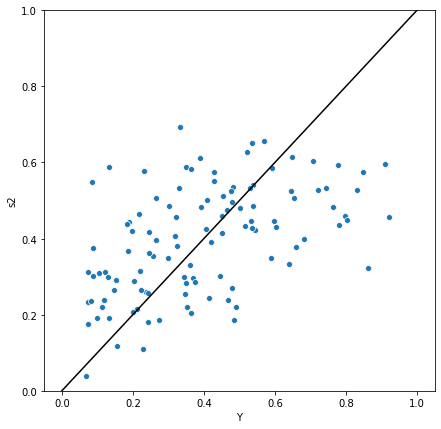

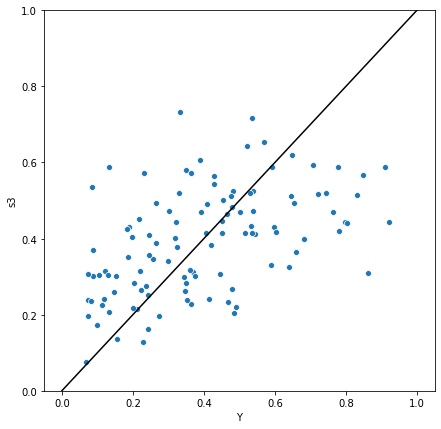

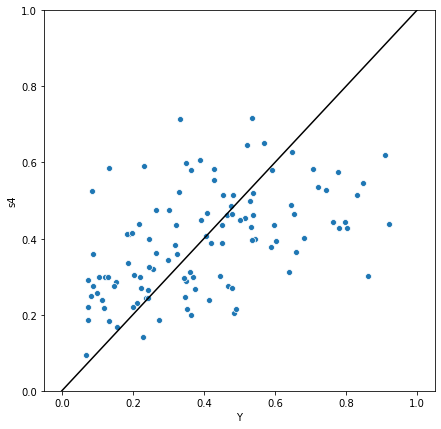

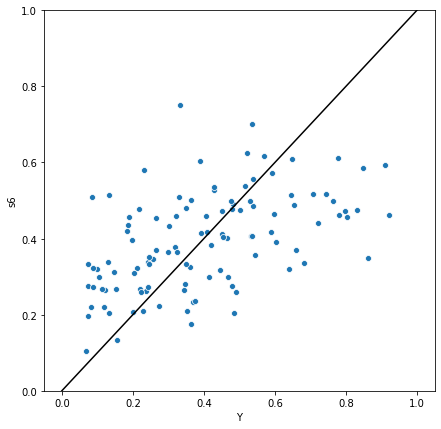

In [9]:
variables=['age','sex','bmi','bp','s2','s3','s4','s6']

MSEoptimo=None
MAEoptimo=None
MADoptimo=None
variableMSEoptima=None
variableMAEoptima=None
variableMADoptima=None

resultados=pd.DataFrame(columns=columnas)

for i in variables:
    MSE=0
    MAE=0
    MAD=0
    
    x=dataFrameScalar.loc[:,[i, 's5','s1']]
    y=dataFrameScalar.loc[:,['Y']]
    xEntrenamiento, xValidacion, yEntrenamiento, yValidacion = train_test_split(x, y, test_size=0.25, random_state=0)

    model=linear_model.LinearRegression()
    model.fit(xEntrenamiento,yEntrenamiento)
    yPrediccion=model.predict(xValidacion)
    MSE=mean_squared_error(yValidacion,yPrediccion)
    MAE=mean_absolute_error(yValidacion,yPrediccion)
    MAD=robust.mad(yPrediccion)
    
    plt.figure(figsize=(7, 7))
    yValidacion[i] = yPrediccion
    sns.scatterplot(x='Y', y=i, data= yValidacion)
    plt.plot([0, 1], [0, 1], color='black')
    plt.ylim(0,1)
    
    resultado=pd.DataFrame([['s5, s1, '+i,MSE,MAE,MAD]],columns=columnas)
    resultados=pd.concat([resultados,resultado])
    
    
    if MSEoptimo==None or MSE<MSEoptimo:
        MSEoptimo=MSE
        variableMSEoptima=i
    if MAEoptimo==None or MAE<MAEoptimo:
        MAEoptimo=MAE
        variableMAEoptima=i
    if MADoptimo==None or MAD<MADoptimo:
        MADoptimo=MAD
        variableMADoptima=i

print(resultados)
print("Para el modelo de regresion lineal con 3 variables incluyendo s5 y s1, el menor error MSE fue de {} y fue con la tercera variable {}".
      format(MSEoptimo,variableMSEoptima))
print("Para el modelo de regresion lineal con 3 variables incluyendo s5 y s1, el menor error MAE fue de {} y fue con la tercera variable {}".
      format(MAEoptimo,variableMAEoptima))
print("Para el modelo de regresion lineal con 3 variables incluyendo s5, s1, el menor error MAD fue de {} con fue con la tercera variable {}".
      format(MADoptimo,variableMADoptima))

Aunque el MAD se redujo al tener las variables s5, s1 y sex, aumenta el MSE al usar s5,s1 y bp (siendo este el menor MSE) con respecto al modelo anterior. Se le dara preferencia al MSE subre el MAD por el modelo que se esta evaluando (regresion lineal). 

Por lo tanto, se seguira con el modelo con las variables s5, bp y bmi (con las que se obtuvo un MSE 0.03266704922225998) y se iterara la cuarta variable.

C:\Users\nelson.barco\Anaconda3\lib\site-packages\ipykernel_launcher.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\nelson.barco\Anaconda3\lib\site-packages\ipykernel_launcher.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\nelson.barco\Anaconda3\lib\site-packages\ipykernel_launcher.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://p

           variable       MSE       MAE                    MAD
0  s5, bp, bmi, age  0.032942  0.146646  [0.16924707841228104]
0  s5, bp, bmi, sex  0.032029  0.143977  [0.17064156442315595]
0   s5, bp, bmi, s1  0.032928  0.144256  [0.16316590198759506]
0   s5, bp, bmi, s2  0.033063  0.145123  [0.16091385127118635]
0   s5, bp, bmi, s3  0.032223  0.144468    [0.170626404137761]
0   s5, bp, bmi, s4  0.032526  0.145108  [0.17737164378295311]
0   s5, bp, bmi, s6  0.032696  0.145023  [0.17205606598976758]
Para el modelo de regresion lineal con 4 variables incluyendo s5, bp y bmi, el menor error MSE fue de 0.032028568880348364 y fue con la tercera variable sex
Para el modelo de regresion lineal con 4 variables incluyendo s5, bp y bmi, el menor error MAE fue de 0.14397748219508044 y fue con la tercera variable sex
Para el modelo de regresion lineal con 4 variables incluyendo s5, bp y bmi, el menor error MAD fue de [0.16091385] con fue con la tercera variable s2


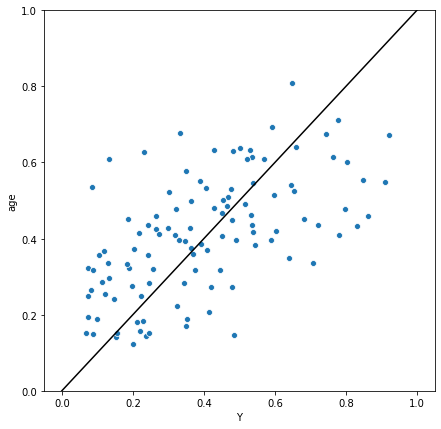

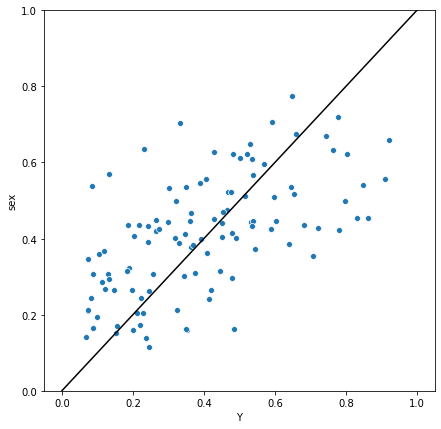

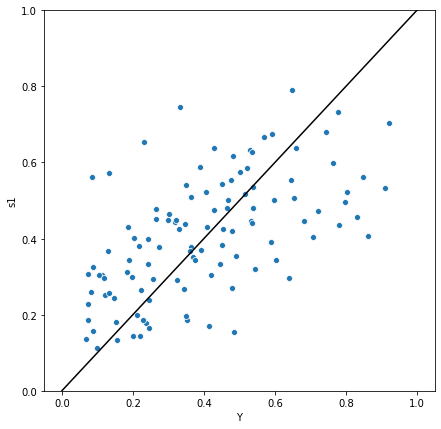

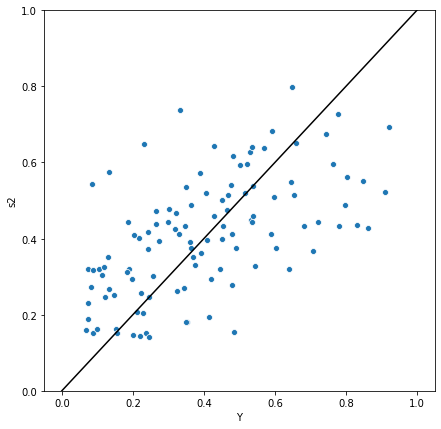

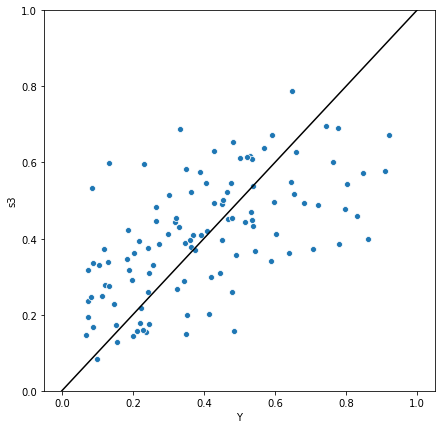

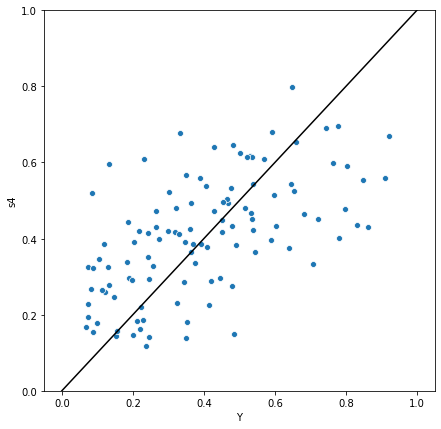

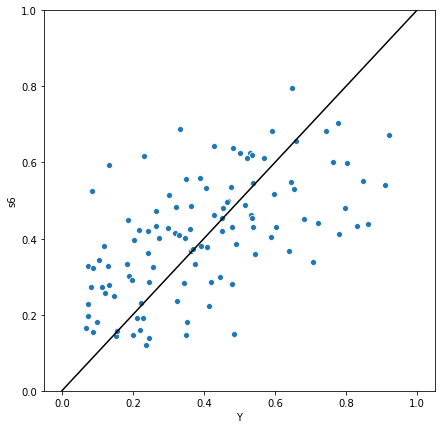

In [10]:
variables=['age','sex','s1','s2','s3','s4','s6']

MSEoptimo=None
MAEoptimo=None
MADoptimo=None
variableMSEoptima=None
variableMAEoptima=None
variableMADoptima=None

resultados=pd.DataFrame(columns=columnas)

for i in variables:
    MSE=0
    MAE=0
    MAD=0
    
    x=dataFrameScalar.loc[:,[i, 's5','bp','bmi']]
    y=dataFrameScalar.loc[:,['Y']]
    xEntrenamiento, xValidacion, yEntrenamiento, yValidacion = train_test_split(x, y, test_size=0.25, random_state=0)

    model=linear_model.LinearRegression()
    model.fit(xEntrenamiento,yEntrenamiento)
    yPrediccion=model.predict(xValidacion)
    MSE=mean_squared_error(yValidacion,yPrediccion)
    MAE=mean_absolute_error(yValidacion,yPrediccion)
    MAD=robust.mad(yPrediccion)
    
    plt.figure(figsize=(7, 7))
    yValidacion[i] = yPrediccion
    sns.scatterplot(x='Y', y=i, data= yValidacion)
    plt.plot([0, 1], [0, 1], color='black')
    plt.ylim(0,1)
    
    resultado=pd.DataFrame([['s5, bp, bmi, '+i,MSE,MAE,MAD]],columns=columnas)
    resultados=pd.concat([resultados,resultado])
    
    
    if MSEoptimo==None or MSE<MSEoptimo:
        MSEoptimo=MSE
        variableMSEoptima=i
    if MAEoptimo==None or MAE<MAEoptimo:
        MAEoptimo=MAE
        variableMAEoptima=i
    if MADoptimo==None or MAD<MADoptimo:
        MADoptimo=MAD
        variableMADoptima=i

print(resultados)
print("Para el modelo de regresion lineal con 4 variables incluyendo s5, bp y bmi, el menor error MSE fue de {} y fue con la tercera variable {}".
      format(MSEoptimo,variableMSEoptima))
print("Para el modelo de regresion lineal con 4 variables incluyendo s5, bp y bmi, el menor error MAE fue de {} y fue con la tercera variable {}".
      format(MAEoptimo,variableMAEoptima))
print("Para el modelo de regresion lineal con 4 variables incluyendo s5, bp y bmi, el menor error MAD fue de {} con fue con la tercera variable {}".
      format(MADoptimo,variableMADoptima))

En el modelo de regresion lienal, con la variable sex (junto con s5, bp y bmi) se obtuvo un MSE = 0.032028568880348364, un poco menor al MSE obtenido antes (solo con s5,bp y bmi). Ahora se hara el modelo con las 4 variables (s5, bp, bmi, sex) e iterando la 5 con las restantes

C:\Users\nelson.barco\Anaconda3\lib\site-packages\ipykernel_launcher.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\nelson.barco\Anaconda3\lib\site-packages\ipykernel_launcher.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\nelson.barco\Anaconda3\lib\site-packages\ipykernel_launcher.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://p

                variable       MSE       MAE                    MAD
0  s5, bp, bmi, sex, age  0.032338  0.144950  [0.17233564627712508]
0   s5, bp, bmi, sex, s1  0.032182  0.143198   [0.1855605810680079]
0   s5, bp, bmi, sex, s2  0.032448  0.144799  [0.17638148364595208]
0   s5, bp, bmi, sex, s3  0.030726  0.141434    [0.167072315850795]
0   s5, bp, bmi, sex, s4  0.031559  0.144149   [0.1624133634065412]
0   s5, bp, bmi, sex, s6  0.031934  0.143672   [0.1698752375972083]
Para el modelo de regresion lineal con 5 variables incluyendo s5, bp, bmi y sex, el menor error MSE fue de 0.030726021085365304 y fue con la tercera variable s3
Para el modelo de regresion lineal con 5 variables incluyendo s5, bp, bmi y sex, el menor error MAE fue de 0.14143354371889372 y fue con la tercera variable s3
Para el modelo de regresion lineal con 5 variables incluyendo s5, bp, bmi y sex, el menor error MAD fue de [0.16241336] con fue con la tercera variable s4


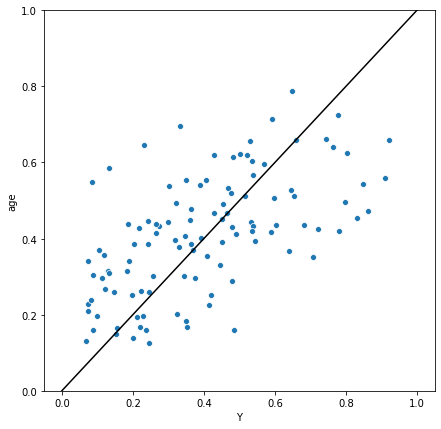

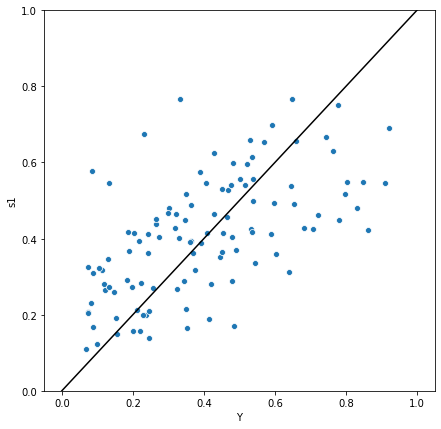

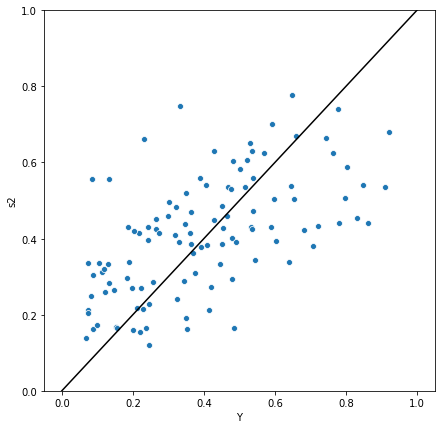

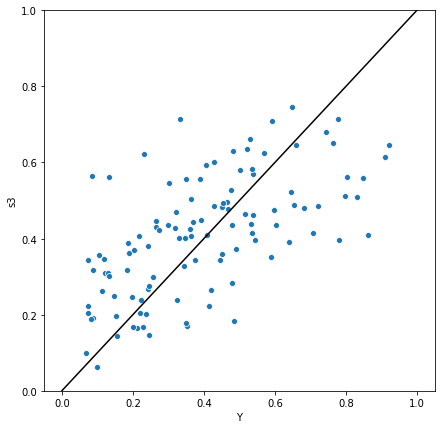

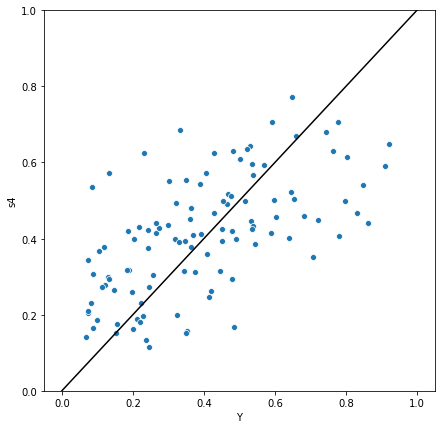

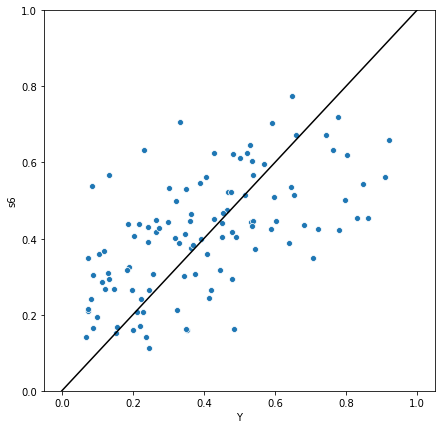

In [11]:
variables=['age','s1','s2','s3','s4','s6']

MSEoptimo=None
MAEoptimo=None
MADoptimo=None
variableMSEoptima=None
variableMAEoptima=None
variableMADoptima=None

resultados=pd.DataFrame(columns=columnas)

for i in variables:
    MSE=0
    MAE=0
    MAD=0
    
    x=dataFrameScalar.loc[:,[i, 's5','bp','bmi','sex']]
    y=dataFrameScalar.loc[:,['Y']]
    xEntrenamiento, xValidacion, yEntrenamiento, yValidacion = train_test_split(x, y, test_size=0.25, random_state=0)

    model=linear_model.LinearRegression()
    model.fit(xEntrenamiento,yEntrenamiento)
    yPrediccion=model.predict(xValidacion)
    MSE=mean_squared_error(yValidacion,yPrediccion)
    MAE=mean_absolute_error(yValidacion,yPrediccion)
    MAD=robust.mad(yPrediccion)
    
    plt.figure(figsize=(7, 7))
    yValidacion[i] = yPrediccion
    sns.scatterplot(x='Y', y=i, data= yValidacion)
    plt.plot([0, 1], [0, 1], color='black')
    plt.ylim(0,1)
    
    resultado=pd.DataFrame([['s5, bp, bmi, sex, '+i,MSE,MAE,MAD]],columns=columnas)
    resultados=pd.concat([resultados,resultado])
    
    
    if MSEoptimo==None or MSE<MSEoptimo:
        MSEoptimo=MSE
        variableMSEoptima=i
    if MAEoptimo==None or MAE<MAEoptimo:
        MAEoptimo=MAE
        variableMAEoptima=i
    if MADoptimo==None or MAD<MADoptimo:
        MADoptimo=MAD
        variableMADoptima=i

print(resultados)
print("Para el modelo de regresion lineal con 5 variables incluyendo s5, bp, bmi y sex, el menor error MSE fue de {} y fue con la tercera variable {}".
      format(MSEoptimo,variableMSEoptima))
print("Para el modelo de regresion lineal con 5 variables incluyendo s5, bp, bmi y sex, el menor error MAE fue de {} y fue con la tercera variable {}".
      format(MAEoptimo,variableMAEoptima))
print("Para el modelo de regresion lineal con 5 variables incluyendo s5, bp, bmi y sex, el menor error MAD fue de {} con fue con la tercera variable {}".
      format(MADoptimo,variableMADoptima))

En el modelo de regresion lienal, con la variable s3 (junto con s5, bp, bmi y sex) se obtuvo un MSE = 0.0307260210853653, menor al MSE obtenido antes (solo con s5,bp, bmi y sex). Ahora se hara el modelo con las 5 variables (s5, bp, bmi, sex, s3) e iterando la 6 con las restantes

C:\Users\nelson.barco\Anaconda3\lib\site-packages\ipykernel_launcher.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\nelson.barco\Anaconda3\lib\site-packages\ipykernel_launcher.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\nelson.barco\Anaconda3\lib\site-packages\ipykernel_launcher.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://p

                    variable       MSE       MAE                    MAD
0  s5, bp, bmi, sex, s3, age  0.031036  0.142447  [0.15854094140018513]
0   s5, bp, bmi, sex, s3, s1  0.031273  0.141528  [0.17804239383679493]
0   s5, bp, bmi, sex, s3, s2  0.031389  0.141862  [0.17597757707989445]
0   s5, bp, bmi, sex, s3, s4  0.031201  0.141786   [0.1696946343031644]
0   s5, bp, bmi, sex, s3, s6  0.030696  0.141332  [0.16654631747013812]
Para el modelo de regresion lineal con 6 variables incluyendo s5, bp, bmi, sex y s3, el menor error MSE fue de 0.030695717592947376 y fue con la tercera variable s6
Para el modelo de regresion lineal con 6 variables incluyendo s5, bp, bmi, sex y s3, el menor error MAE fue de 0.1413324136961271 y fue con la tercera variable s6
Para el modelo de regresion lineal con 6 variables incluyendo s5, bp, bmi, sex y s3, el menor error MAD fue de [0.15854094] con fue con la tercera variable age


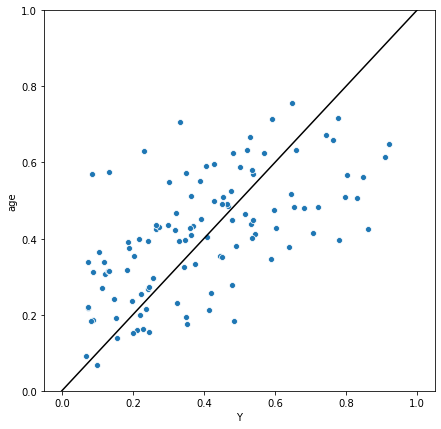

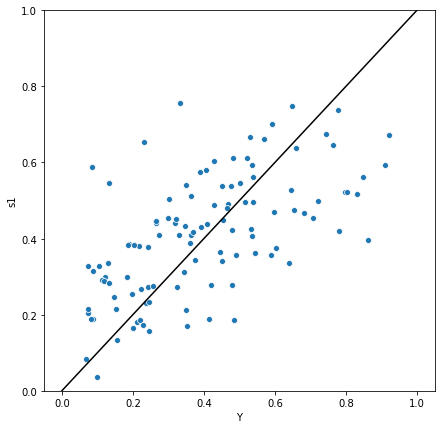

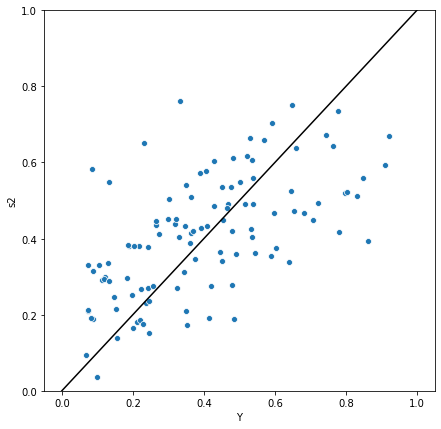

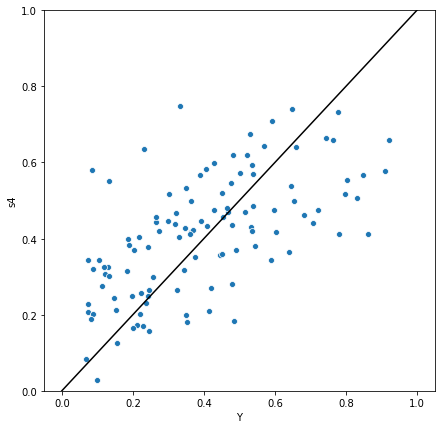

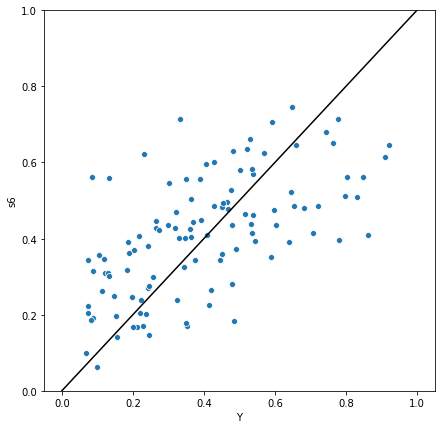

In [12]:
variables=['age','s1','s2','s4','s6']

MSEoptimo=None
MAEoptimo=None
MADoptimo=None
variableMSEoptima=None
variableMAEoptima=None
variableMADoptima=None

resultados=pd.DataFrame(columns=columnas)

for i in variables:
    MSE=0
    MAE=0
    MAD=0
    
    x=dataFrameScalar.loc[:,[i, 's5','bp','bmi','sex','s3']]
    y=dataFrameScalar.loc[:,['Y']]
    xEntrenamiento, xValidacion, yEntrenamiento, yValidacion = train_test_split(x, y, test_size=0.25, random_state=0)

    model=linear_model.LinearRegression()
    model.fit(xEntrenamiento,yEntrenamiento)
    yPrediccion=model.predict(xValidacion)
    MSE=mean_squared_error(yValidacion,yPrediccion)
    MAE=mean_absolute_error(yValidacion,yPrediccion)
    MAD=robust.mad(yPrediccion)
    
    plt.figure(figsize=(7, 7))
    yValidacion[i] = yPrediccion
    sns.scatterplot(x='Y', y=i, data= yValidacion)
    plt.plot([0, 1], [0, 1], color='black')
    plt.ylim(0,1)
    
    resultado=pd.DataFrame([['s5, bp, bmi, sex, s3, '+i,MSE,MAE,MAD]],columns=columnas)
    resultados=pd.concat([resultados,resultado])
    
    
    if MSEoptimo==None or MSE<MSEoptimo:
        MSEoptimo=MSE
        variableMSEoptima=i
    if MAEoptimo==None or MAE<MAEoptimo:
        MAEoptimo=MAE
        variableMAEoptima=i
    if MADoptimo==None or MAD<MADoptimo:
        MADoptimo=MAD
        variableMADoptima=i

print(resultados)
print("Para el modelo de regresion lineal con 6 variables incluyendo s5, bp, bmi, sex y s3, el menor error MSE fue de {} y fue con la tercera variable {}".
      format(MSEoptimo,variableMSEoptima))
print("Para el modelo de regresion lineal con 6 variables incluyendo s5, bp, bmi, sex y s3, el menor error MAE fue de {} y fue con la tercera variable {}".
      format(MAEoptimo,variableMAEoptima))
print("Para el modelo de regresion lineal con 6 variables incluyendo s5, bp, bmi, sex y s3, el menor error MAD fue de {} con fue con la tercera variable {}".
      format(MADoptimo,variableMADoptima))

En el modelo de regresion lienal, con la variable s6 (junto con s5, bp, bmi, sex, s3) se obtuvo un MSE = 0.030695717592, un poco menor al MSE obtenido antes (solo con s5, bp, bmi, sex, s3). Ahora se hara el modelo con las 6 variables (s5, bp, bmi, sex, s3, s6) e iterando la 7 con las restantes

C:\Users\nelson.barco\Anaconda3\lib\site-packages\ipykernel_launcher.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\nelson.barco\Anaconda3\lib\site-packages\ipykernel_launcher.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\nelson.barco\Anaconda3\lib\site-packages\ipykernel_launcher.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://p

                        variable       MSE       MAE                    MAD
0  s5, bp, bmi, sex, s3, s6, age  0.030957  0.142237  [0.15657480742168997]
0   s5, bp, bmi, sex, s3, s6, s1  0.031114  0.141022   [0.1771787347560163]
0   s5, bp, bmi, sex, s3, s6, s2  0.031241  0.141391   [0.1780354384382618]
0   s5, bp, bmi, sex, s3, s6, s4  0.031080  0.141425  [0.16873474536306285]
Para el modelo de regresion lineal con 7 variables incluyendo s5, bp, bmi, sex, s6 y s3, el menor error MSE fue de 0.03095715018456625 y fue con la tercera variable age
Para el modelo de regresion lineal con 7 variables incluyendo s5, bp, bmi, sex, s6 y s3, el menor error MAE fue de 0.14102222125210653 y fue con la tercera variable s1
Para el modelo de regresion lineal con 7 variables incluyendo s5, bp, bmi, sex, s6 y s3, el menor error MAD fue de [0.15657481] con fue con la tercera variable age


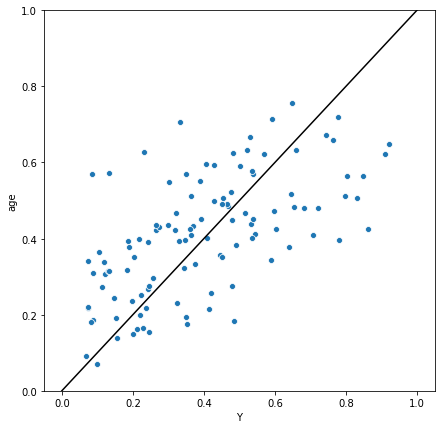

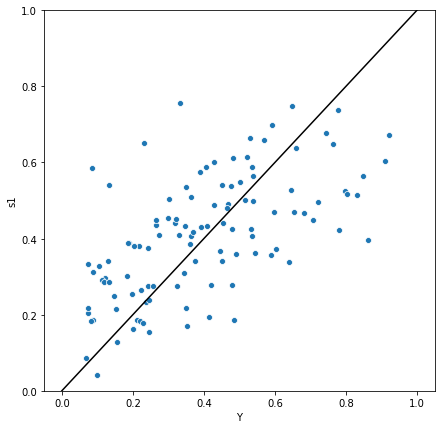

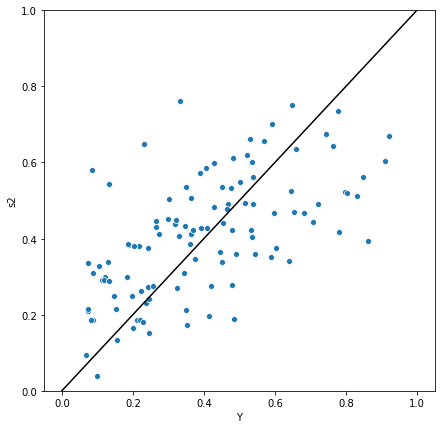

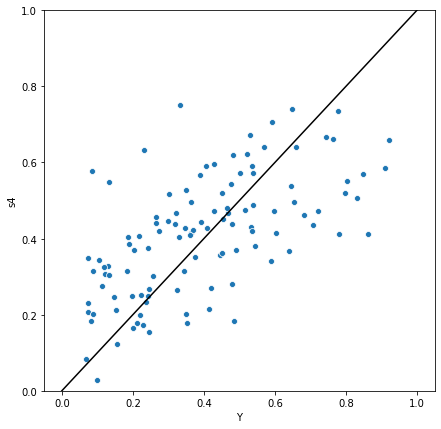

In [13]:
variables=['age','s1','s2','s4']

MSEoptimo=None
MAEoptimo=None
MADoptimo=None
variableMSEoptima=None
variableMAEoptima=None
variableMADoptima=None

resultados=pd.DataFrame(columns=columnas)

for i in variables:
    MSE=0
    MAE=0
    MAD=0
    
    x=dataFrameScalar.loc[:,[i, 's5','bp','bmi','sex','s3','s6']]
    y=dataFrameScalar.loc[:,['Y']]
    xEntrenamiento, xValidacion, yEntrenamiento, yValidacion = train_test_split(x, y, test_size=0.25, random_state=0)

    model=linear_model.LinearRegression()
    model.fit(xEntrenamiento,yEntrenamiento)
    yPrediccion=model.predict(xValidacion)
    MSE=mean_squared_error(yValidacion,yPrediccion)
    MAE=mean_absolute_error(yValidacion,yPrediccion)
    MAD=robust.mad(yPrediccion)
    
    plt.figure(figsize=(7, 7))
    yValidacion[i] = yPrediccion
    sns.scatterplot(x='Y', y=i, data= yValidacion)
    plt.plot([0, 1], [0, 1], color='black')
    plt.ylim(0,1)
    
    resultado=pd.DataFrame([['s5, bp, bmi, sex, s3, s6, '+i,MSE,MAE,MAD]],columns=columnas)
    resultados=pd.concat([resultados,resultado])
    
    
    if MSEoptimo==None or MSE<MSEoptimo:
        MSEoptimo=MSE
        variableMSEoptima=i
    if MAEoptimo==None or MAE<MAEoptimo:
        MAEoptimo=MAE
        variableMAEoptima=i
    if MADoptimo==None or MAD<MADoptimo:
        MADoptimo=MAD
        variableMADoptima=i

print(resultados)
print("Para el modelo de regresion lineal con 7 variables incluyendo s5, bp, bmi, sex, s6 y s3, el menor error MSE fue de {} y fue con la tercera variable {}".
      format(MSEoptimo,variableMSEoptima))
print("Para el modelo de regresion lineal con 7 variables incluyendo s5, bp, bmi, sex, s6 y s3, el menor error MAE fue de {} y fue con la tercera variable {}".
      format(MAEoptimo,variableMAEoptima))
print("Para el modelo de regresion lineal con 7 variables incluyendo s5, bp, bmi, sex, s6 y s3, el menor error MAD fue de {} con fue con la tercera variable {}".
      format(MADoptimo,variableMADoptima))

En el modelo de regresion lienal, con la variable age (junto con s5, bp, bmi, sex, s3, s6) se obtuvo un MSE = 0.03095715018456625, superior al MSE obtenido en el modelo anterior  MSE=0.030695717592. Por lo tanto, estas variables ya no mejorar el modelo y por el contrario empizan a sesgar sus resultados.

EL mejor modelo lineal, sin transformar ni modificar las variables, es el que se genera con las variables s5, bp, bmi, sex, s3, s6.

A continuación, aplicacions las transformaciones raiz cuadrada, raiz cubica y logaritmo natural a la variable Y para ver si mejora la predicción del modelo

C:\Users\nelson.barco\Anaconda3\lib\site-packages\pandas\core\series.py:679: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\nelson.barco\Anaconda3\lib\site-packages\scipy\linalg\basic.py:1231: RuntimeWarning: overflow encountered in square
  resids = np.sum(np.abs(x[n:])**2, axis=0)
C:\Users\nelson.barco\Anaconda3\lib\site-packages\sklearn\metrics\_regression.py:254: RuntimeWarning: overflow encountered in square
  output_errors = np.average((y_true - y_pred) ** 2, axis=0,


               transformacion       MSE            MAE  \
0              sinTransformar  0.030696   1.413324e-01   
0  transformacionRaizCuadrada  0.020512   1.140386e-01   
0    transformacionRaizCubica  0.013389   9.212225e-02   
0    transformacionLogNatural       inf  7.322695e+305   

                       MAD  
0     [0.1665463174701383]  
0     [0.1410461723053232]  
0    [0.11456221346850776]  
0  [7.38171108707284e+305]  
-----------------------------------------------------------------------------------
Para el modelo de regresion lineal con 6 variables incluyendo s5, bp, bmi, sex, s6 y s3, el menor error MSE fue de 0.013388720786769403 y fue con la tercera variable transformacionRaizCubica
Para el modelo de regresion lineal con 6 variables incluyendo s5, bp, bmi, sex, s6 y s3, el menor error MAE fue de 0.09212224855865997 y fue con la tercera variable transformacionRaizCubica
Para el modelo de regresion lineal con 6 variables incluyendo s5, bp, bmi, sex, s6 y s3, el menor e

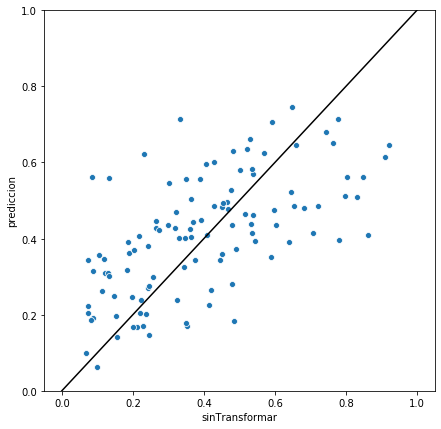

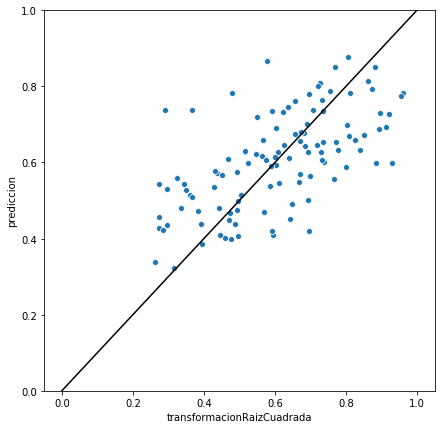

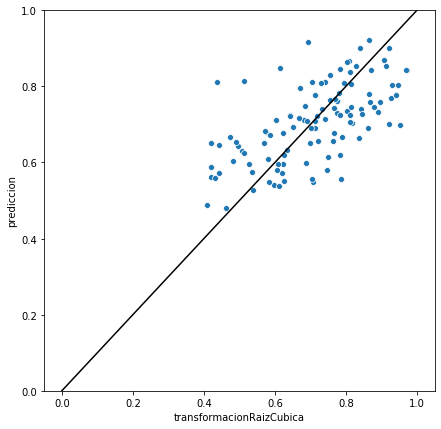

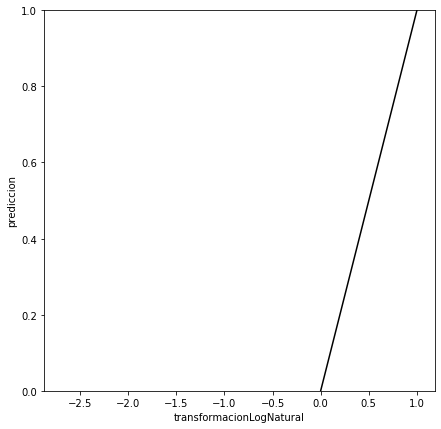

In [14]:
transformaciones=['sinTransformar','transformacionRaizCuadrada','transformacionRaizCubica','transformacionLogNatural']
columnas=['transformacion','MSE','MAE','MAD']

x=dataFrameScalar.loc[:,['s5','bp','bmi','sex','s3','s6']]
y=dataFrameScalar['Y']

yTransformaciones=pd.DataFrame(columns=transformaciones)
yTransformaciones['sinTransformar'] = y
yTransformaciones['transformacionLogNatural'] = np.log(y)
yTransformaciones['transformacionRaizCuadrada'] = np.sqrt(y)
yTransformaciones['transformacionRaizCubica'] = np.cbrt(y)

yTransformaciones['transformacionLogNatural']=np.nan_to_num(yTransformaciones['transformacionLogNatural'].tolist())


MSEoptimo=None
MAEoptimo=None
MADoptimo=None
transformacionMSEoptima=None
transformacionMAEoptima=None
transformacionMADoptima=None

resultados=pd.DataFrame(columns=columnas)

for i in transformaciones:
    xEntrenamiento, xValidacion, yEntrenamiento, yValidacion = train_test_split(x, yTransformaciones.loc[:,[i]], test_size=0.25, random_state=0)

    MSE=0
    MAE=0
    MAD=0

    model=linear_model.LinearRegression()
    model.fit(xEntrenamiento,yEntrenamiento)
    yPrediccion=model.predict(xValidacion)
    MSE=mean_squared_error(yValidacion,yPrediccion)
    MAE=mean_absolute_error(yValidacion,yPrediccion)
    MAD=robust.mad(yPrediccion)
    
    plt.figure(figsize=(7, 7))
    yValidacion['prediccion'] = yPrediccion
    sns.scatterplot(x=i, y='prediccion', data= yValidacion)
    plt.plot([0, 1], [0, 1], color='black')
    plt.ylim(0,1)
    
    resultado=pd.DataFrame([[i,MSE,MAE,MAD]],columns=columnas)
    resultados=pd.concat([resultados,resultado])
    
    
    if MSEoptimo==None or MSE<MSEoptimo:
        MSEoptimo=MSE
        transformacionMSEoptima=i
    if MAEoptimo==None or MAE<MAEoptimo:
        MAEoptimo=MAE
        transformacionMAEoptima=i
    if MADoptimo==None or MAD<MADoptimo:
        MADoptimo=MAD
        transformacionMADoptima=i

print(resultados.head())
print('-----------------------------------------------------------------------------------')
print("Para el modelo de regresion lineal con 6 variables incluyendo s5, bp, bmi, sex, s6 y s3, el menor error MSE fue de {} y fue con la tercera variable {}".
      format(MSEoptimo,transformacionMSEoptima))
print("Para el modelo de regresion lineal con 6 variables incluyendo s5, bp, bmi, sex, s6 y s3, el menor error MAE fue de {} y fue con la tercera variable {}".
      format(MAEoptimo,transformacionMAEoptima))
print("Para el modelo de regresion lineal con 6 variables incluyendo s5, bp, bmi, sex, s6 y s3, el menor error MAD fue de {} con fue con la tercera variable {}".
      format(MADoptimo,transformacionMADoptima))

Segun las graficas y los resultados arrojados por el antorior script que evalua las trasnformaciones logaritmo natural, raiz cubica y raiz cuadrada sobre la variable de predicción y, con la raiz cuadrada y la raiz cubica se encuentra una mejor aproximacion y un menor erorr MSE y menor MAD que con los datos sin transformar, para la misma cantidad de variables (6 variables, s5, bp, bmi, sex, s6 y s3). La transformación logaritmo natural presenta problemas con valores muy grandes (NaN o Infinitos) por lo tanto se descarta.

Se concluye que la mejor transformación para tratar los datos e la de raiz cubica, ya que ofrece un MSE de 0.013388720786769403 y un MAD de 0.11456221, valores muy inferiores comparados con los errores arrojados con el modelo producido con la variable y sin transformar (MSE= 0.030696 y MAD = 0.1665463174701383)

### Selección de caracteristicas con sklear
Ahora miremos si nuestra seleccion empirica y por tanteo es acorde a una selección automatizada con la libreria sklearn

In [18]:
variables=dataFrame.columns
variables=variables[:-1]
x=dataFrameScalar[variables]
y=dataFrameScalar['Y']

estimator = linear_model.SGDRegressor(max_iter=100, tol=1e-3)
selector = RFECV(estimator, step=3, cv=5)
selector = selector.fit(x, y)
indices = selector.get_support(indices = True)
carac = variables[indices]
print("Para el modelo sin transformar la variable de salida y, las caracteristicas seleccionadas son: ",carac)

Para el modelo sin transformar la variable de salida y, las caracteristicas seleccionadas son:  Index(['age', 'bmi', 'bp', 's1', 's4', 's5', 's6'], dtype='object')


In [16]:
variables=dataFrame.columns
variables=variables[:-1]
x=dataFrameScalar[variables]
y=yTransformaciones['transformacionRaizCubica']

estimator = linear_model.SGDRegressor(max_iter=100, tol=1e-3)
selector = RFECV(estimator, step=3, cv=5)
selector = selector.fit(x, y)
indices = selector.get_support(indices = True)
carac = variables[indices]
print("Para el modelo con la variable de salida y transformada con raiz cubica, las caracteristicas seleccionadas son: ",carac)

Para el modelo con la variable de salida y transformada con raiz cubica, las caracteristicas seleccionadas son:  Index(['bmi', 'bp', 's5', 's6'], dtype='object')


El algoritmo de selección de variables arrojo 4 de las 6 variables utilizadas en el modelo escogido como el mejor hasta el momento, para ambos casos. Se procede a probar los modelos recomendados por el algoritmo de selección de variables (con las variables 'bmi', 'bp', 's5', 's6' y 'age', 'bmi', 'bp', 's1', 's4', 's5', 's6')

C:\Users\nelson.barco\Anaconda3\lib\site-packages\pandas\core\series.py:679: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\nelson.barco\Anaconda3\lib\site-packages\scipy\linalg\basic.py:1231: RuntimeWarning: overflow encountered in square
  resids = np.sum(np.abs(x[n:])**2, axis=0)
C:\Users\nelson.barco\Anaconda3\lib\site-packages\sklearn\metrics\_regression.py:254: RuntimeWarning: overflow encountered in square
  output_errors = np.average((y_true - y_pred) ** 2, axis=0,


               transformacion       MSE            MAE  \
0              sinTransformar  0.032696   1.450232e-01   
0  transformacionRaizCuadrada  0.022009   1.200716e-01   
0    transformacionRaizCubica  0.014377   9.710119e-02   
0    transformacionLogNatural       inf  5.980652e+305   

                         MAD  
0      [0.17205606598976775]  
0       [0.1397281917854125]  
0      [0.11029533187322199]  
0  [3.3573134535533485e+305]  
-----------------------------------------------------------------------------------
Para el modelo de regresion lineal con 4 variables incluyendo s5, bp, bmi, s6 el menor error MSE fue de 0.0143765801665303 y fue con la tercera variable transformacionRaizCubica
Para el modelo de regresion lineal con 4 variables incluyendo s5, bp, bmi, s6 el menor error MAE fue de 0.09710119370933647 y fue con la tercera variable transformacionRaizCubica
Para el modelo de regresion lineal con 4 variables incluyendo s5, bp, bmi, s6 el menor error MAD fue de [0.110295

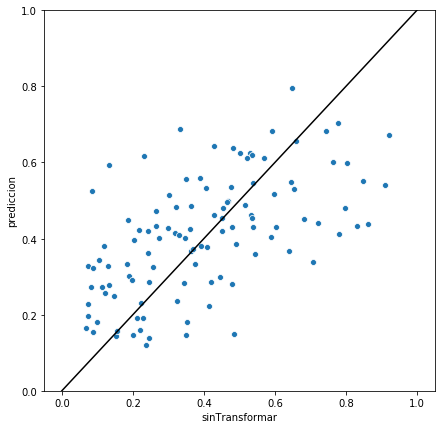

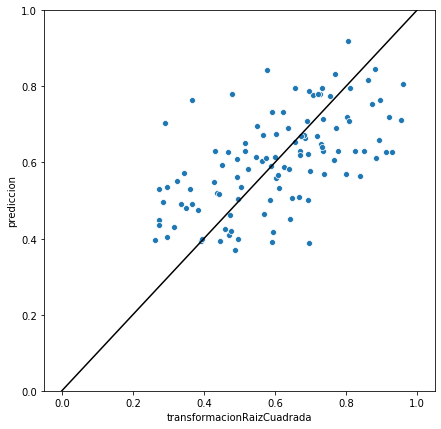

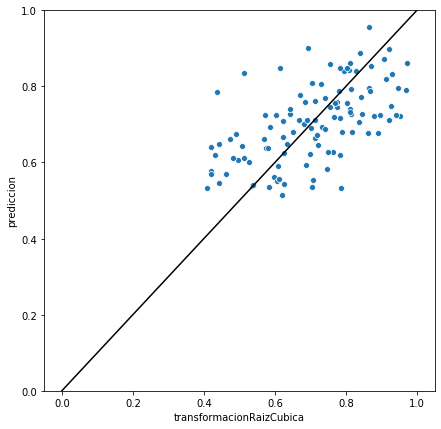

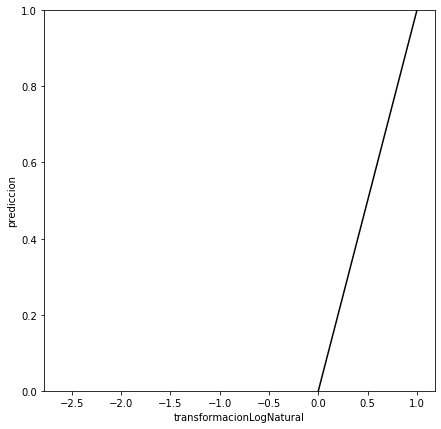

In [19]:
transformaciones=['sinTransformar','transformacionRaizCuadrada','transformacionRaizCubica','transformacionLogNatural']
columnas=['transformacion','MSE','MAE','MAD']

x=dataFrameScalar.loc[:,['s5','bp','bmi','s6']]
y=dataFrameScalar['Y']

yTransformaciones=pd.DataFrame(columns=transformaciones)
yTransformaciones['sinTransformar'] = y
yTransformaciones['transformacionLogNatural'] = np.log(y)
yTransformaciones['transformacionRaizCuadrada'] = np.sqrt(y)
yTransformaciones['transformacionRaizCubica'] = np.cbrt(y)

yTransformaciones['transformacionLogNatural']=np.nan_to_num(yTransformaciones['transformacionLogNatural'].tolist())


MSEoptimo=None
MAEoptimo=None
MADoptimo=None
transformacionMSEoptima=None
transformacionMAEoptima=None
transformacionMADoptima=None

resultados=pd.DataFrame(columns=columnas)

for i in transformaciones:
    xEntrenamiento, xValidacion, yEntrenamiento, yValidacion = train_test_split(x, yTransformaciones.loc[:,[i]], test_size=0.25, random_state=0)

    MSE=0
    MAE=0
    MAD=0

    model=linear_model.LinearRegression()
    model.fit(xEntrenamiento,yEntrenamiento)
    yPrediccion=model.predict(xValidacion)
    MSE=mean_squared_error(yValidacion,yPrediccion)
    MAE=mean_absolute_error(yValidacion,yPrediccion)
    MAD=robust.mad(yPrediccion)
    
    plt.figure(figsize=(7, 7))
    yValidacion['prediccion'] = yPrediccion
    sns.scatterplot(x=i, y='prediccion', data= yValidacion)
    plt.plot([0, 1], [0, 1], color='black')
    plt.ylim(0,1)
    
    resultado=pd.DataFrame([[i,MSE,MAE,MAD]],columns=columnas)
    resultados=pd.concat([resultados,resultado])
    
    
    if MSEoptimo==None or MSE<MSEoptimo:
        MSEoptimo=MSE
        transformacionMSEoptima=i
    if MAEoptimo==None or MAE<MAEoptimo:
        MAEoptimo=MAE
        transformacionMAEoptima=i
    if MADoptimo==None or MAD<MADoptimo:
        MADoptimo=MAD
        transformacionMADoptima=i

print(resultados.head())
print('-----------------------------------------------------------------------------------')
print("Para el modelo de regresion lineal con 4 variables incluyendo s5, bp, bmi, s6 el menor error MSE fue de {} y fue con la tercera variable {}".
      format(MSEoptimo,transformacionMSEoptima))
print("Para el modelo de regresion lineal con 4 variables incluyendo s5, bp, bmi, s6 el menor error MAE fue de {} y fue con la tercera variable {}".
      format(MAEoptimo,transformacionMAEoptima))
print("Para el modelo de regresion lineal con 4 variables incluyendo s5, bp, bmi, s6 el menor error MAD fue de {} con fue con la tercera variable {}".
      format(MADoptimo,transformacionMADoptima))

C:\Users\nelson.barco\Anaconda3\lib\site-packages\pandas\core\series.py:679: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\nelson.barco\Anaconda3\lib\site-packages\scipy\linalg\basic.py:1231: RuntimeWarning: overflow encountered in square
  resids = np.sum(np.abs(x[n:])**2, axis=0)
C:\Users\nelson.barco\Anaconda3\lib\site-packages\sklearn\metrics\_regression.py:254: RuntimeWarning: overflow encountered in square
  output_errors = np.average((y_true - y_pred) ** 2, axis=0,


               transformacion       MSE            MAE  \
0              sinTransformar  0.032720   1.442053e-01   
0  transformacionRaizCuadrada  0.021805   1.184277e-01   
0    transformacionRaizCubica  0.014198   9.568516e-02   
0    transformacionLogNatural       inf  6.746382e+305   

                        MAD  
0     [0.17122590217132874]  
0     [0.13895711883212933]  
0     [0.11233557843279103]  
0  [5.194288291950709e+305]  
-----------------------------------------------------------------------------------
Para el modelo de regresion lineal con 4 variables incluyendo s5, bp, bmi, s6 el menor error MSE fue de 0.014198296256768118 y fue con la tercera variable transformacionRaizCubica
Para el modelo de regresion lineal con 4 variables incluyendo s5, bp, bmi, s6 el menor error MAE fue de 0.09568516161686058 y fue con la tercera variable transformacionRaizCubica
Para el modelo de regresion lineal con 4 variables incluyendo s5, bp, bmi, s6 el menor error MAD fue de [0.11233558]

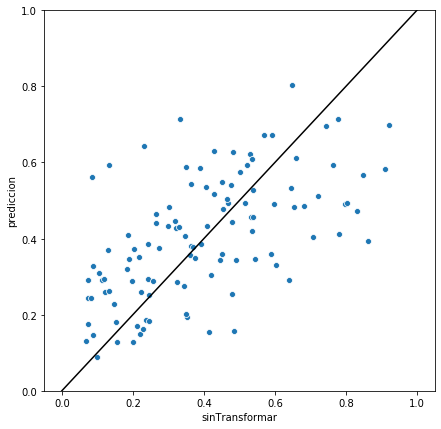

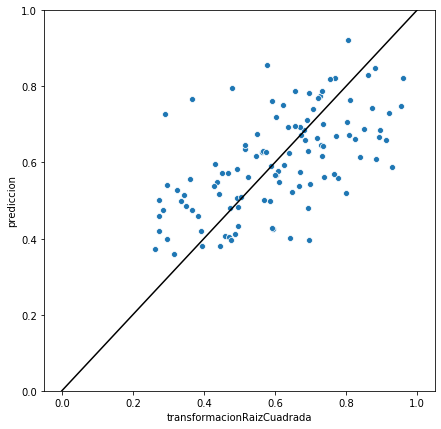

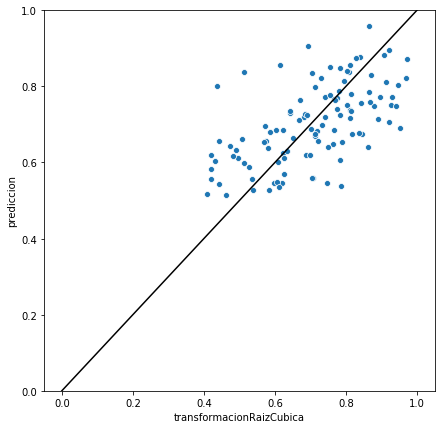

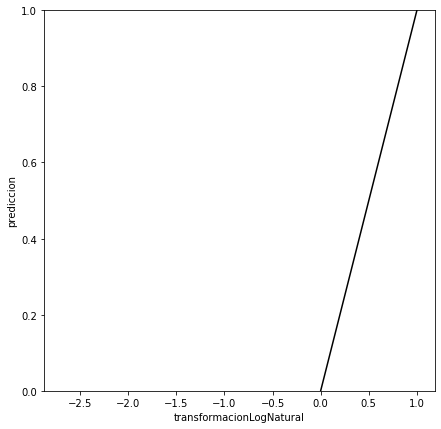

In [20]:
transformaciones=['sinTransformar','transformacionRaizCuadrada','transformacionRaizCubica','transformacionLogNatural']
columnas=['transformacion','MSE','MAE','MAD']

x=dataFrameScalar.loc[:,['age', 'bmi', 'bp', 's1', 's4', 's5', 's6']]
y=dataFrameScalar['Y']

yTransformaciones=pd.DataFrame(columns=transformaciones)
yTransformaciones['sinTransformar'] = y
yTransformaciones['transformacionLogNatural'] = np.log(y)
yTransformaciones['transformacionRaizCuadrada'] = np.sqrt(y)
yTransformaciones['transformacionRaizCubica'] = np.cbrt(y)

yTransformaciones['transformacionLogNatural']=np.nan_to_num(yTransformaciones['transformacionLogNatural'].tolist())


MSEoptimo=None
MAEoptimo=None
MADoptimo=None
transformacionMSEoptima=None
transformacionMAEoptima=None
transformacionMADoptima=None

resultados=pd.DataFrame(columns=columnas)

for i in transformaciones:
    xEntrenamiento, xValidacion, yEntrenamiento, yValidacion = train_test_split(x, yTransformaciones.loc[:,[i]], test_size=0.25, random_state=0)

    MSE=0
    MAE=0
    MAD=0

    model=linear_model.LinearRegression()
    model.fit(xEntrenamiento,yEntrenamiento)
    yPrediccion=model.predict(xValidacion)
    MSE=mean_squared_error(yValidacion,yPrediccion)
    MAE=mean_absolute_error(yValidacion,yPrediccion)
    MAD=robust.mad(yPrediccion)
    
    plt.figure(figsize=(7, 7))
    yValidacion['prediccion'] = yPrediccion
    sns.scatterplot(x=i, y='prediccion', data= yValidacion)
    plt.plot([0, 1], [0, 1], color='black')
    plt.ylim(0,1)
    
    resultado=pd.DataFrame([[i,MSE,MAE,MAD]],columns=columnas)
    resultados=pd.concat([resultados,resultado])
    
    
    if MSEoptimo==None or MSE<MSEoptimo:
        MSEoptimo=MSE
        transformacionMSEoptima=i
    if MAEoptimo==None or MAE<MAEoptimo:
        MAEoptimo=MAE
        transformacionMAEoptima=i
    if MADoptimo==None or MAD<MADoptimo:
        MADoptimo=MAD
        transformacionMADoptima=i

print(resultados.head())
print('-----------------------------------------------------------------------------------')
print("Para el modelo de regresion lineal con 4 variables incluyendo s5, bp, bmi, s6 el menor error MSE fue de {} y fue con la tercera variable {}".
      format(MSEoptimo,transformacionMSEoptima))
print("Para el modelo de regresion lineal con 4 variables incluyendo s5, bp, bmi, s6 el menor error MAE fue de {} y fue con la tercera variable {}".
      format(MAEoptimo,transformacionMAEoptima))
print("Para el modelo de regresion lineal con 4 variables incluyendo s5, bp, bmi, s6 el menor error MAD fue de {} con fue con la tercera variable {}".
      format(MADoptimo,transformacionMADoptima))

Sigue teniendo un menor error MSE y MAE el modelo con las variables encontradas por tanteo (con las 6 variables s5, bp, bmi, sex, s6 y s3) que el mejor de los modelo con las variables encontradas con el algoritmo de selección de caracteristicas (con las variables 'age', 'bmi', 'bp', 's1', 's4', 's5', 's6'). Este ultimo presenta menor desviacion MAD que el mencionado primero. Sin embargo la metrica escogida para escoger el modelo es el MSE.

### Conclusión primera parte
El mejor modelo encontrado para una regresión lineal con el dataset provisto por el profesor es el modelo de regresión lineal con las variables de entrada x=[s5, bp, bmi, sex, s6 y s3] y la variable de salida y=cbrt(Y) con un error  MSE de MSE=0.01338872

## Desarrollo modelo de redes neuronales en base al modelo de regresión lineal

A continuación se desarrollara un modelo de redes nueronales Regresión no lineal con perceptrones multicapa, se implementara primero con todas las variables del data set y luego con las variables que del mejor modelo escogido en la primera parte. Se probaran varias configuraciones de la red y se escogera la que tenga menor score en la validacion cruzada (cross validation)

Puede que no se encuentre la mejor configuración posible pero se intentara probar muchas combinaciones de funciones de activacion, solver y numero de neuronas y capas ocultas.

Para encontrar la red neuronal optima se utilizara la herramienta de sklearn preprocesing GridSearchCV, la cual itera los parametros que se le entreguen y para escoger la mejor red utiliza cross validation

### Red Neuronal MLP con todas las variables del data set

In [21]:
#
# Evalua el clasificador usando validación cruzada
#

from sklearn.model_selection import cross_val_score, KFold
from scipy.stats import sem
from sklearn import preprocessing
from sklearn.pipeline import make_pipeline

def evaluate_cross_validation(clf, X, y, n_splits):

    # Crea el objeto para partir los datos
    kf = KFold(n_splits=n_splits, shuffle=True, random_state=8)

    # Realiza la partición para la muestra de datos de entrenamiento
    cv = kf.get_n_splits(X)

    # Ejecuta el entrenamiento para cada partifición
    scores = cross_val_score(clf, X, y, cv=cv, scoring = 'neg_mean_squared_error')

    # Reporta los resultados
    return(scores)

In [22]:
variables=dataFrame.columns
variables=variables[:-1]
x=dataFrameScalar.loc[:,variables]
y=dataFrameScalar.loc[:,['Y']]
xEntrenamiento, xValidacion, yEntrenamiento, yValidacion = train_test_split(x, y, test_size=0.25, random_state=0)

from sklearn.model_selection import GridSearchCV
parameter_space = {
    'hidden_layer_sizes': [(1,),(2,),(3,),(4,),(5,),(6,),(7,),(8,),(9,),(10,),(12,),(14,),(16,),(18,),(20,),
                           (25,),(30,),(35,),(40,),(45,),(50,),
                           (50,50,50),(100,),(50,100,50)],
    'activation': ['tanh', 'relu','logistic'],
    'solver': ['sgd', 'adam','lbfgs'],
    'alpha': [0.0001,0.001, 0.05, 0.1,0.0],
    'learning_rate': ['constant','adaptive'],
}

regresor = MLPRegressor(max_iter = 10000)


clf1 = GridSearchCV(regresor, parameter_space, n_jobs=-1, cv=10)
clf1.fit(xEntrenamiento, yEntrenamiento)

C:\Users\nelson.barco\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GridSearchCV(cv=10, error_score=nan,
             estimator=MLPRegressor(activation='relu', alpha=0.0001,
                                    batch_size='auto', beta_1=0.9, beta_2=0.999,
                                    early_stopping=False, epsilon=1e-08,
                                    hidden_layer_sizes=(100,),
                                    learning_rate='constant',
                                    learning_rate_init=0.001, max_fun=15000,
                                    max_iter=10000, momentum=0.9,
                                    n_iter_no_change=10,
                                    nesterovs_momentum=True, power_t=0.5,
                                    random_sta...
                         'alpha': [0.0001, 0.001, 0.05, 0.1, 0.0],
                         'hidden_layer_sizes': [(1,), (2,), (3,), (4,), (5,),
                                                (6,), (7,), (8,), (9,), (10,),
                                                (12,), (14,), (16,)

In [24]:
# Best paramete set
print('Best parameters found:\n', clf1.best_params_)



Best parameters found:
 {'activation': 'logistic', 'alpha': 0.001, 'hidden_layer_sizes': (2,), 'learning_rate': 'constant', 'solver': 'lbfgs'}


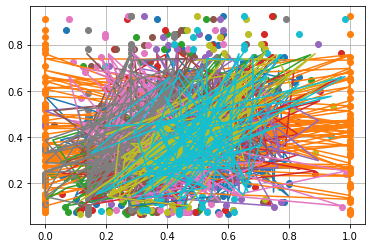

In [35]:
variables=dataFrame.columns
variables=variables[:-1]
x=dataFrameScalar.loc[:,variables]
y=dataFrameScalar.loc[:,['Y']]
xEntrenamiento, xValidacion, yEntrenamiento, yValidacion = train_test_split(x, y, test_size=0.25, random_state=0)
plt.plot(xValidacion, yValidacion, 'o');
plt.grid()
plt.plot(xValidacion, clf1.predict(xValidacion), '-');

Para el modelo con todas las variables, los parametros optimos encontrados fueron:  {'activation': 'logistic', 'alpha': 0.001, 'hidden_layer_sizes': (2,), 'learning_rate': 'constant', 'solver': 'lbfgs'}

### Red Neuronal MLP con las variables de la regresión lineal del data set

In [25]:
variables=dataFrame.columns
variables=variables[:-1]
x=dataFrameScalar.loc[:,['s5', 'bp', 'bmi', 'sex', 's6','s3']]
y=dataFrameScalar.loc[:,['Y']]
xEntrenamiento, xValidacion, yEntrenamiento, yValidacion = train_test_split(x, y, test_size=0.25, random_state=0)


from sklearn.model_selection import GridSearchCV
parameter_space = {
    'hidden_layer_sizes': [(1,),(2,),(3,),(4,),(5,),(6,),(7,),(8,),(9,),(10,),(12,),(14,),(16,),(18,),(20,),
                           (25,),(30,),(35,),(40,),(45,),(50,),
                           (50,50,50),(100,),(50,100,50)],
    'activation': ['tanh', 'relu','logistic'],
    'solver': ['sgd', 'adam','lbfgs'],
    'alpha': [0.0001,0.001, 0.05, 0.1,0.0],
    'learning_rate': ['constant','adaptive'],
}

regresor = MLPRegressor(max_iter = 10000)


clf2 = GridSearchCV(regresor, parameter_space, n_jobs=-1, cv=10)
clf2.fit(xEntrenamiento, yEntrenamiento)

C:\Users\nelson.barco\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GridSearchCV(cv=10, error_score=nan,
             estimator=MLPRegressor(activation='relu', alpha=0.0001,
                                    batch_size='auto', beta_1=0.9, beta_2=0.999,
                                    early_stopping=False, epsilon=1e-08,
                                    hidden_layer_sizes=(100,),
                                    learning_rate='constant',
                                    learning_rate_init=0.001, max_fun=15000,
                                    max_iter=10000, momentum=0.9,
                                    n_iter_no_change=10,
                                    nesterovs_momentum=True, power_t=0.5,
                                    random_sta...
                         'alpha': [0.0001, 0.001, 0.05, 0.1, 0.0],
                         'hidden_layer_sizes': [(1,), (2,), (3,), (4,), (5,),
                                                (6,), (7,), (8,), (9,), (10,),
                                                (12,), (14,), (16,)

In [26]:
# Best paramete set
print('Best parameters found:\n', clf2.best_params_)


Best parameters found:
 {'activation': 'relu', 'alpha': 0.0, 'hidden_layer_sizes': (50, 50, 50), 'learning_rate': 'adaptive', 'solver': 'adam'}


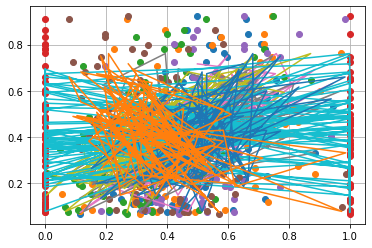

In [29]:
variables=dataFrame.columns
variables=variables[:-1]
x=dataFrameScalar.loc[:,['s5', 'bp', 'bmi', 'sex', 's6','s3']]
y=dataFrameScalar.loc[:,['Y']]
xEntrenamiento, xValidacion, yEntrenamiento, yValidacion = train_test_split(x, y, test_size=0.25, random_state=0)
plt.plot(xValidacion, yValidacion, 'o');
plt.grid()
plt.plot(xValidacion, clf2.predict(xValidacion), '-');

Para el modelo con las variables de la regresión lineal escogida en la primera parte del trabajo, los parametros optimos encontrados fueron:  {'activation': 'relu', 'alpha': 0.0, 'hidden_layer_sizes': (50, 50, 50), 'learning_rate': 'adaptive', 'solver': 'adam'}

## Conclusión segunda parte

Para el modelo de redes neuronales Regresión no lineal con perceptrones multicapa y utilizando todas las variables del dataset, la mejor configuración encontrada fue:

- Numero de capas ocultas:  1
- Numero de neuronas por capa oculta:  2
- Algoritmo de activación:  logistic
- Timpo de solver:  lbfgs
- tasa de aprendizaje: constant
- alpha: 0.001


Para el modelo de redes neuronales Regresión no lineal con perceptrones multicapa y utilizando las variables de la regresión lineal ('s5', 'bp', 'bmi', 'sex', 's6','s3'), la mejor configuración encontrada fue:

- Numero de capas ocultas:  50
- Numero de neuronas por capa oculta:  50
- Algoritmo de activación:  relu
- Timpo de solver:  adam
- tasa de aprendizaje: adaptive
- alpha: 0.0


El modelo de regresión lineal con las variables encontradas de manera empirica por tanteo ('s5', 'bp', 'bmi', 'sex', 's6','s3') fue el que presento una mayor presición (menor MSE), supernado los otros modelos de regresión lineal (utilizando todas las variables y utilizando las variables sugeridas por el algoritmo de selección) y que los modelos de redes neuronales MLP

La selección de variables realizada empiricamente por tanteo presento mejores resultados que la selección por medio de algoritmo selectro de caracteristicas

Tanto para la red neuronal como para la regresión lineal, los modelos preducidos con las variables seleccionadas con el metodo de tanteo fueron los que presentaron mejores resultados.